In [3]:
#Importing the necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', None)
import datetime


In [4]:
#Importing the data as a dataframe

df_sleep = pd.read_csv("sleep_data.csv")
df_sleep2 = pd.read_csv("sleep_data_extra.csv")

df_exercise1 = pd.read_csv("exercise.csv")
df_exercise2 = pd.read_csv("exercise_type.csv")
df_exercise =pd.merge(df_exercise1, df_exercise2)
#df_exercise1.shape[0]

df_sleep['device_id'] = df_sleep2['com.samsung.health.sleep.deviceuuid']

#extracting the time offset number for plotting the location of the user 
df_sleep['time_offset1'] = df_sleep['time_offset'].str[3:-2].apply(float)

#remove zero effieciency sleeps(false data)
df_sleep = df_sleep[df_sleep.efficiency != 0]

#Time formatting
df_sleep['end_time']= pd.to_datetime(df_sleep['end_time'])
df_sleep['start_time']= pd.to_datetime(df_sleep['start_time'])

#time zoning
df_sleep['time_offset'] = pd.to_timedelta(df_sleep['time_offset'].str[3:-2].apply(float),unit ='hours')
df_exercise['time_offset'] = pd.to_timedelta(df_exercise['com.samsung.health.exercise.time_offset'].str[3:-2].apply(float),unit ='hours')


df_sleep['actual_end_time']= df_sleep['end_time'] +df_sleep['time_offset']
df_sleep['actual_start_time']= df_sleep['start_time'] + df_sleep['time_offset']


In [5]:
#days of the week
d = {'weekday_id': [0, 1,2,3,4,5,6], 'Weekday': ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']}
df_weekdays = pd.DataFrame(data=d)

#months of the day
m = {'month_id': [1,2,3,4,5,6,7,8,9,10,11,12], 'Month': ['January','February','March','April','May','June','July','August','September','October','November','December']}
df_months = pd.DataFrame(data=m)

df_sleep['weekday_id'] = df_sleep['actual_start_time'].dt.weekday
df_sleep['month_id'] = df_sleep['actual_start_time'].dt.month


df_sleep = df_sleep.merge(df_weekdays,how ='left')
df_sleep = df_sleep.merge(df_months,how ='left')


df_sleep['day_of_year'] = df_sleep['actual_start_time'].dt.dayofyear
df_sleep['year'] = df_sleep['actual_start_time'].dt.year

df_sleep['bedtime_hour'] = df_sleep['actual_start_time'].dt.hour
df_sleep['bedtime'] = df_sleep['actual_start_time'].dt.hour + df_sleep['actual_start_time'].dt.minute/60

df_sleep['sleep_time_in_minutes'] = (df_sleep['end_time'] - df_sleep['start_time']).dt.total_seconds()/60.0
df_sleep['sleep_time'] = (df_sleep['end_time'] - df_sleep['start_time']).dt.total_seconds()/3600.0

df_sleep_naps = df_sleep[df_sleep.sleep_time_in_minutes <120]

#offset the bedtimes after midnight to make more sense
df_sleep.loc[df_sleep['bedtime'] <= 12,'bedtime'] = df_sleep[df_sleep.bedtime < 12]['bedtime'] + 24


# Plotting the efficiency of the sleep across the week. 

Text(0.5, 0, 'Day')

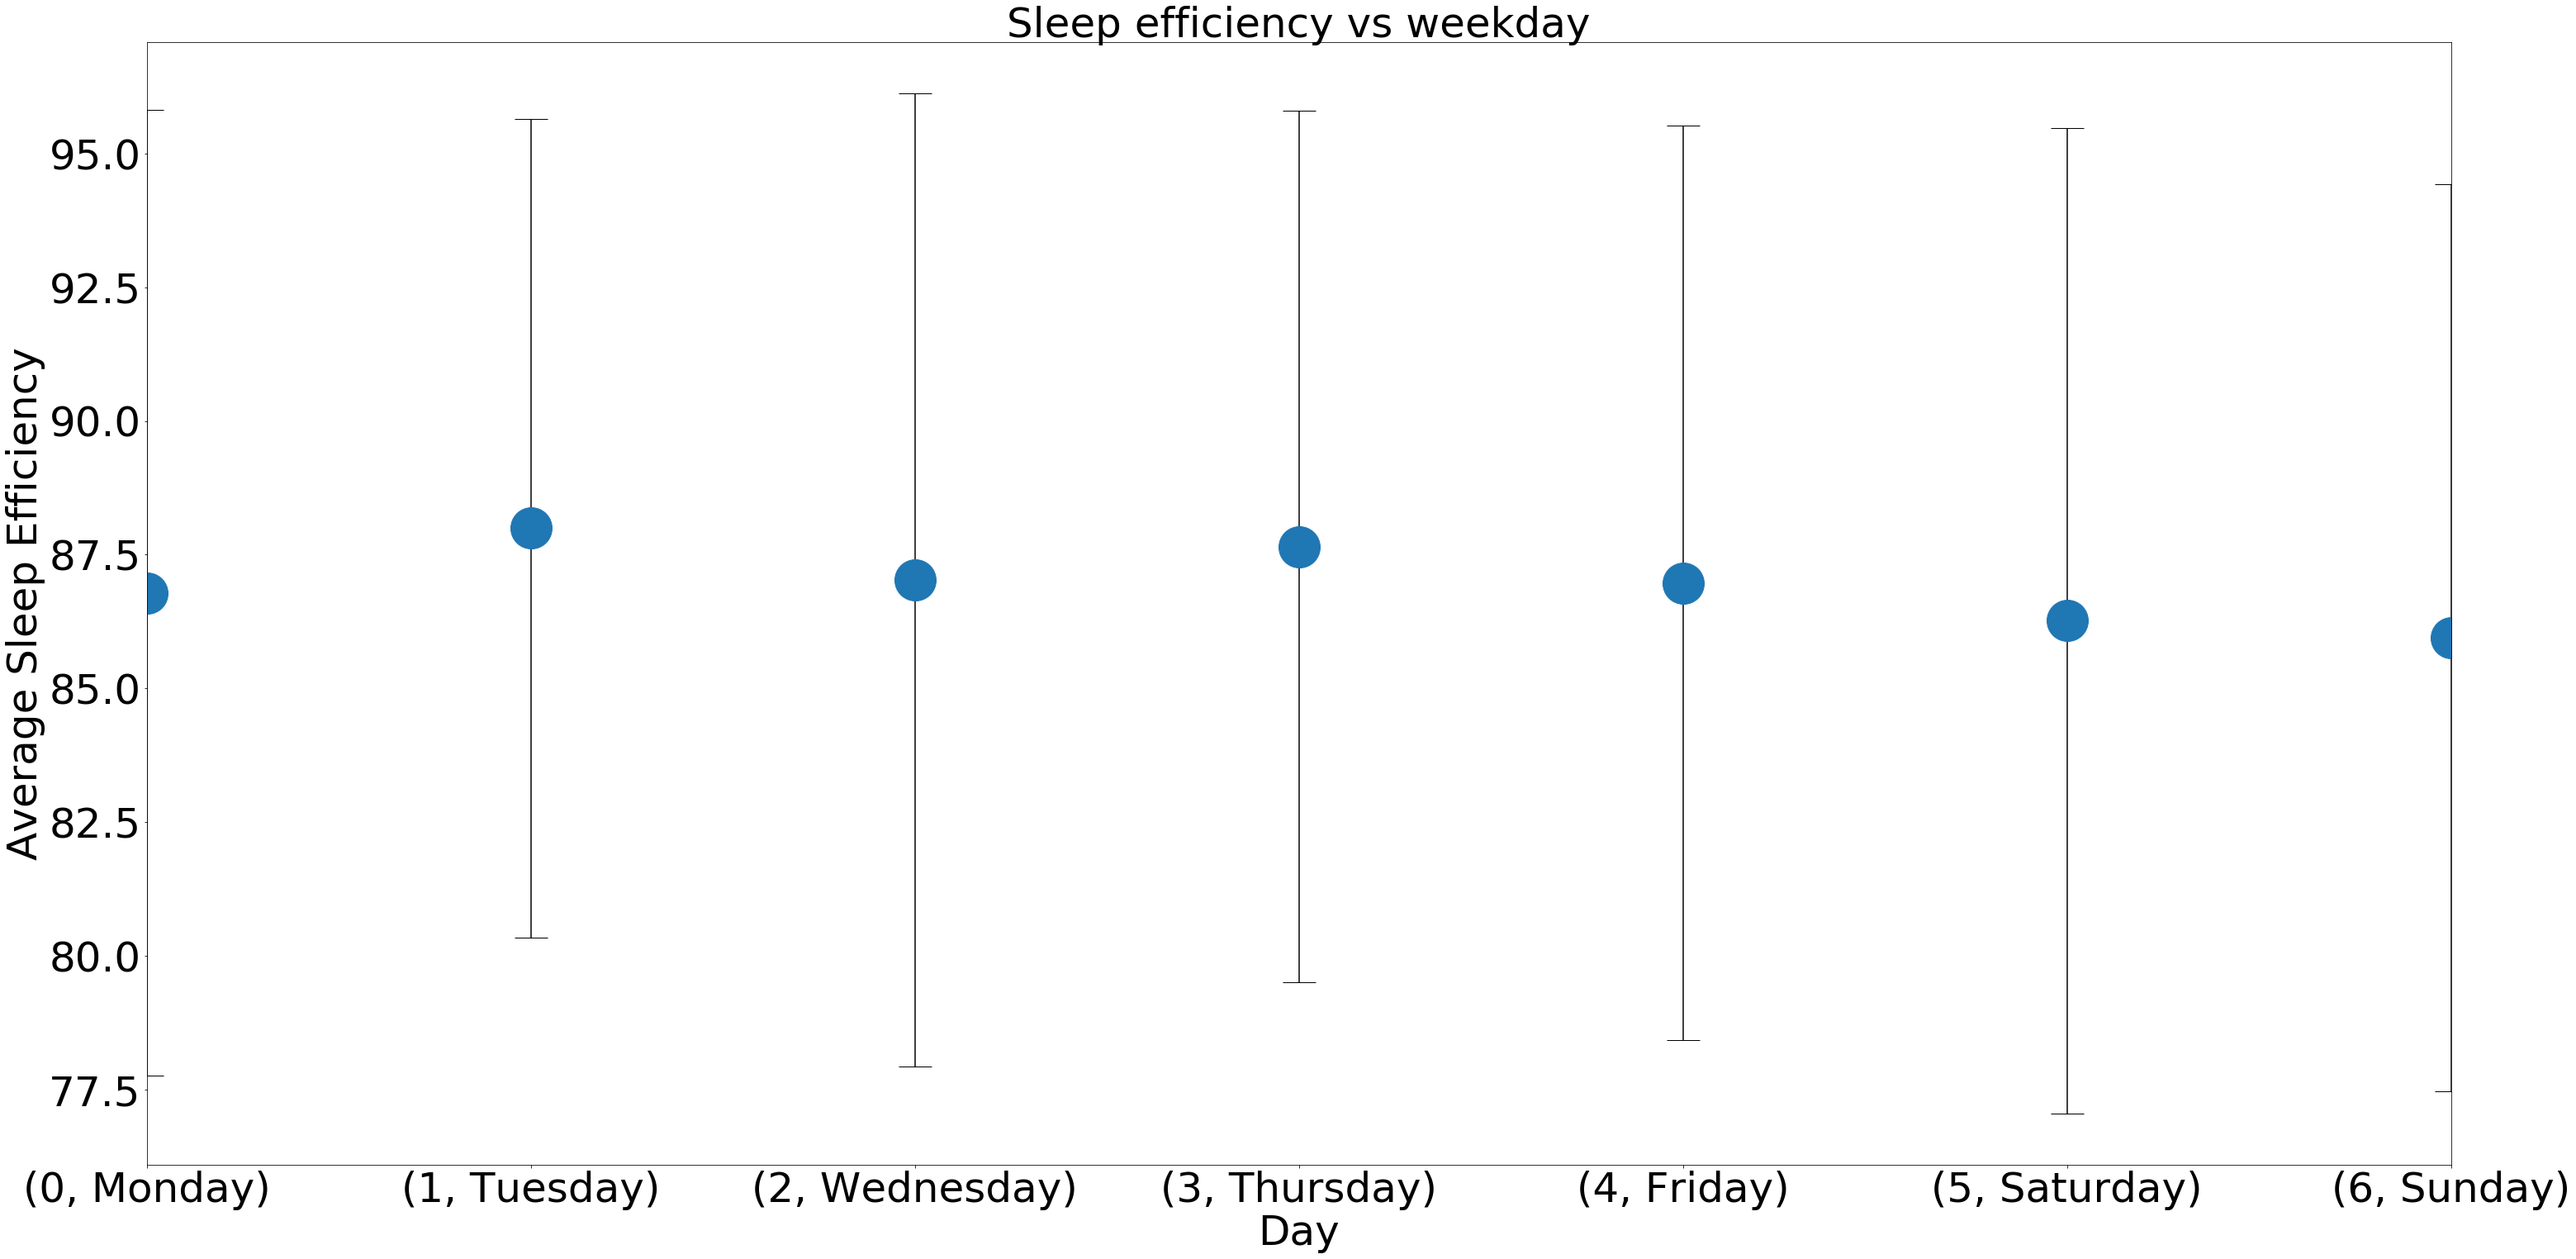

In [6]:
mean_effieciency = df_sleep.groupby(['weekday_id','Weekday'])['efficiency'].mean()
err =  df_sleep.groupby(['weekday_id','Weekday'])['efficiency'].std() #std. dev on the efficiency
ax = mean_effieciency.plot(yerr = err,fmt='o',x= 'weekday_id', y='efficiency', figsize = (50,25),style='o', markersize=50,fontsize = 50,ecolor='black',
       capsize=20)

ax.set_title("Sleep efficiency vs weekday",fontsize=50)
ax.set_ylabel("Average Sleep Efficiency", fontsize=50)
ax.set_xlabel("Day", fontsize=50)

## The errors on the efficiency calculations are very high. The variation across the week does not produce any meaningful interpretations

# Plotting the sleep efficiency across the year, month-wise. 

Text(0.5, 0, 'Month')

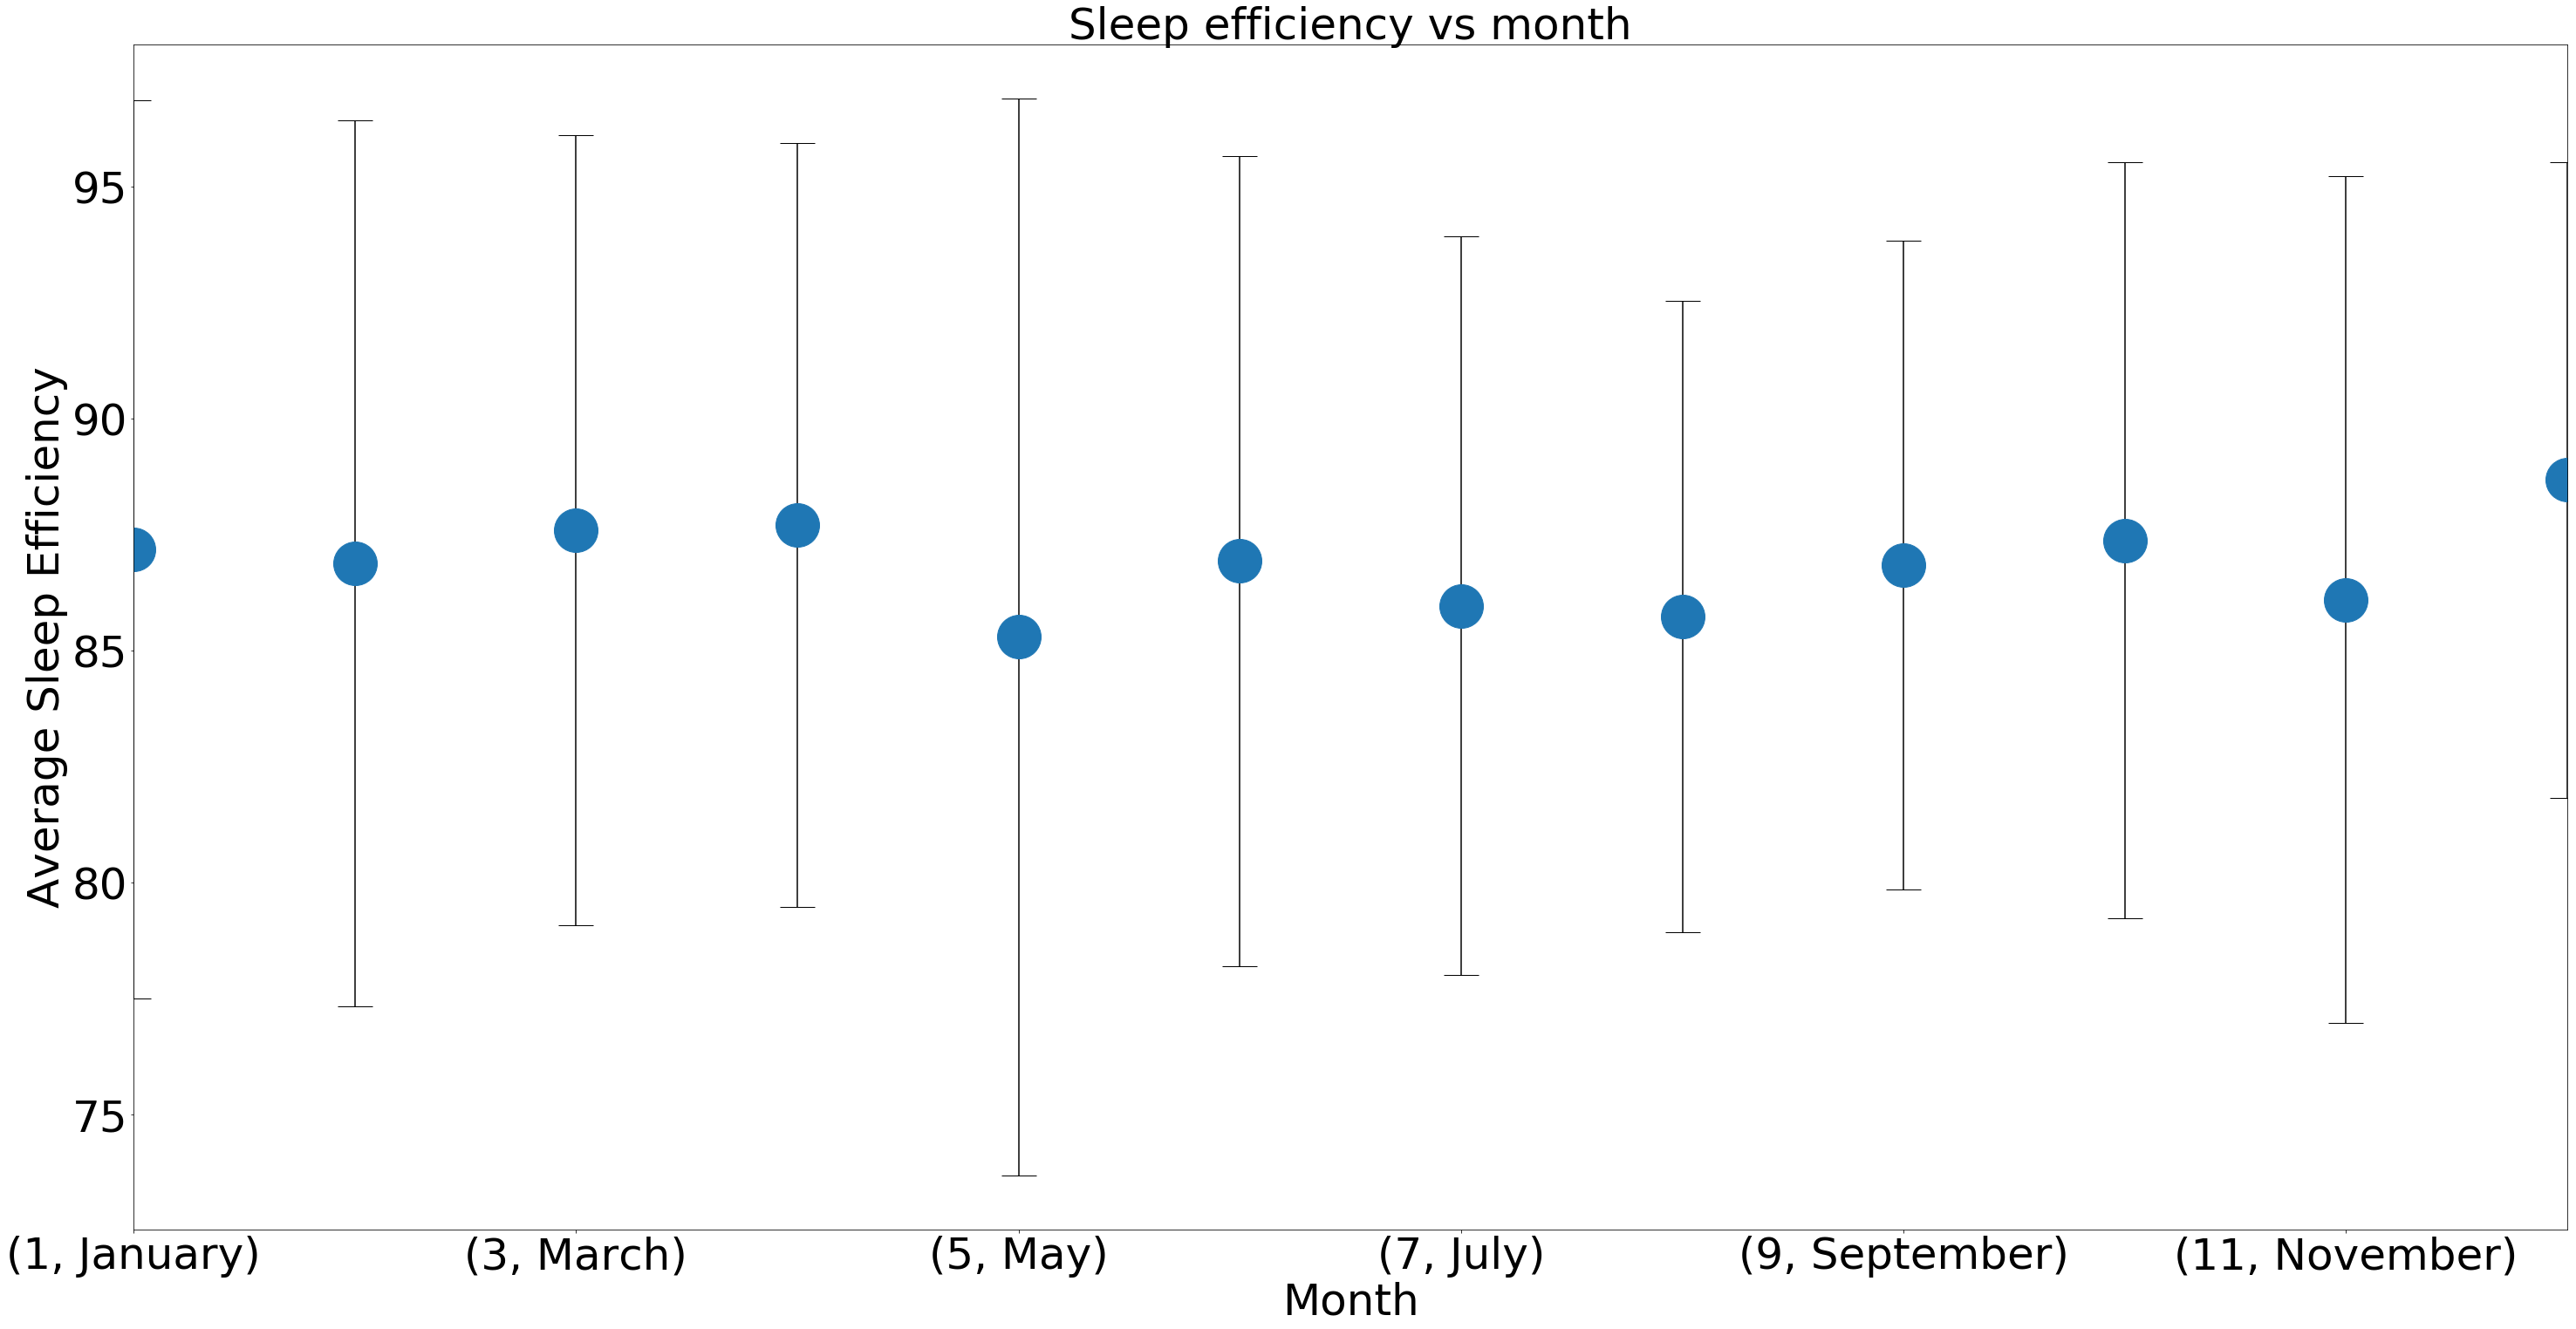

In [7]:
mean_effieciency = df_sleep.groupby(['month_id','Month'])['efficiency'].mean() #Grouping the efficiency by month and calcuting the mean
err = df_sleep.groupby(['month_id','Month']).std()['efficiency']
ax = mean_effieciency.plot( x= 'weekday_id', y='efficiency',yerr = err,fmt='o', figsize = (50,25),style='o', markersize=50,fontsize = 50,ecolor='black',
       capsize=20) #plotting
ax.set_title("Sleep efficiency vs month",fontsize=50)
ax.set_ylabel("Average Sleep Efficiency", fontsize=50)
ax.set_xlabel("Month", fontsize=50)

## The errors on the sleep efficiency is very high and hence, no meaningful interpretations can be made

# Counting the number of sleeps recorded per day in a year

Text(0.5, 0, 'Day of the year')

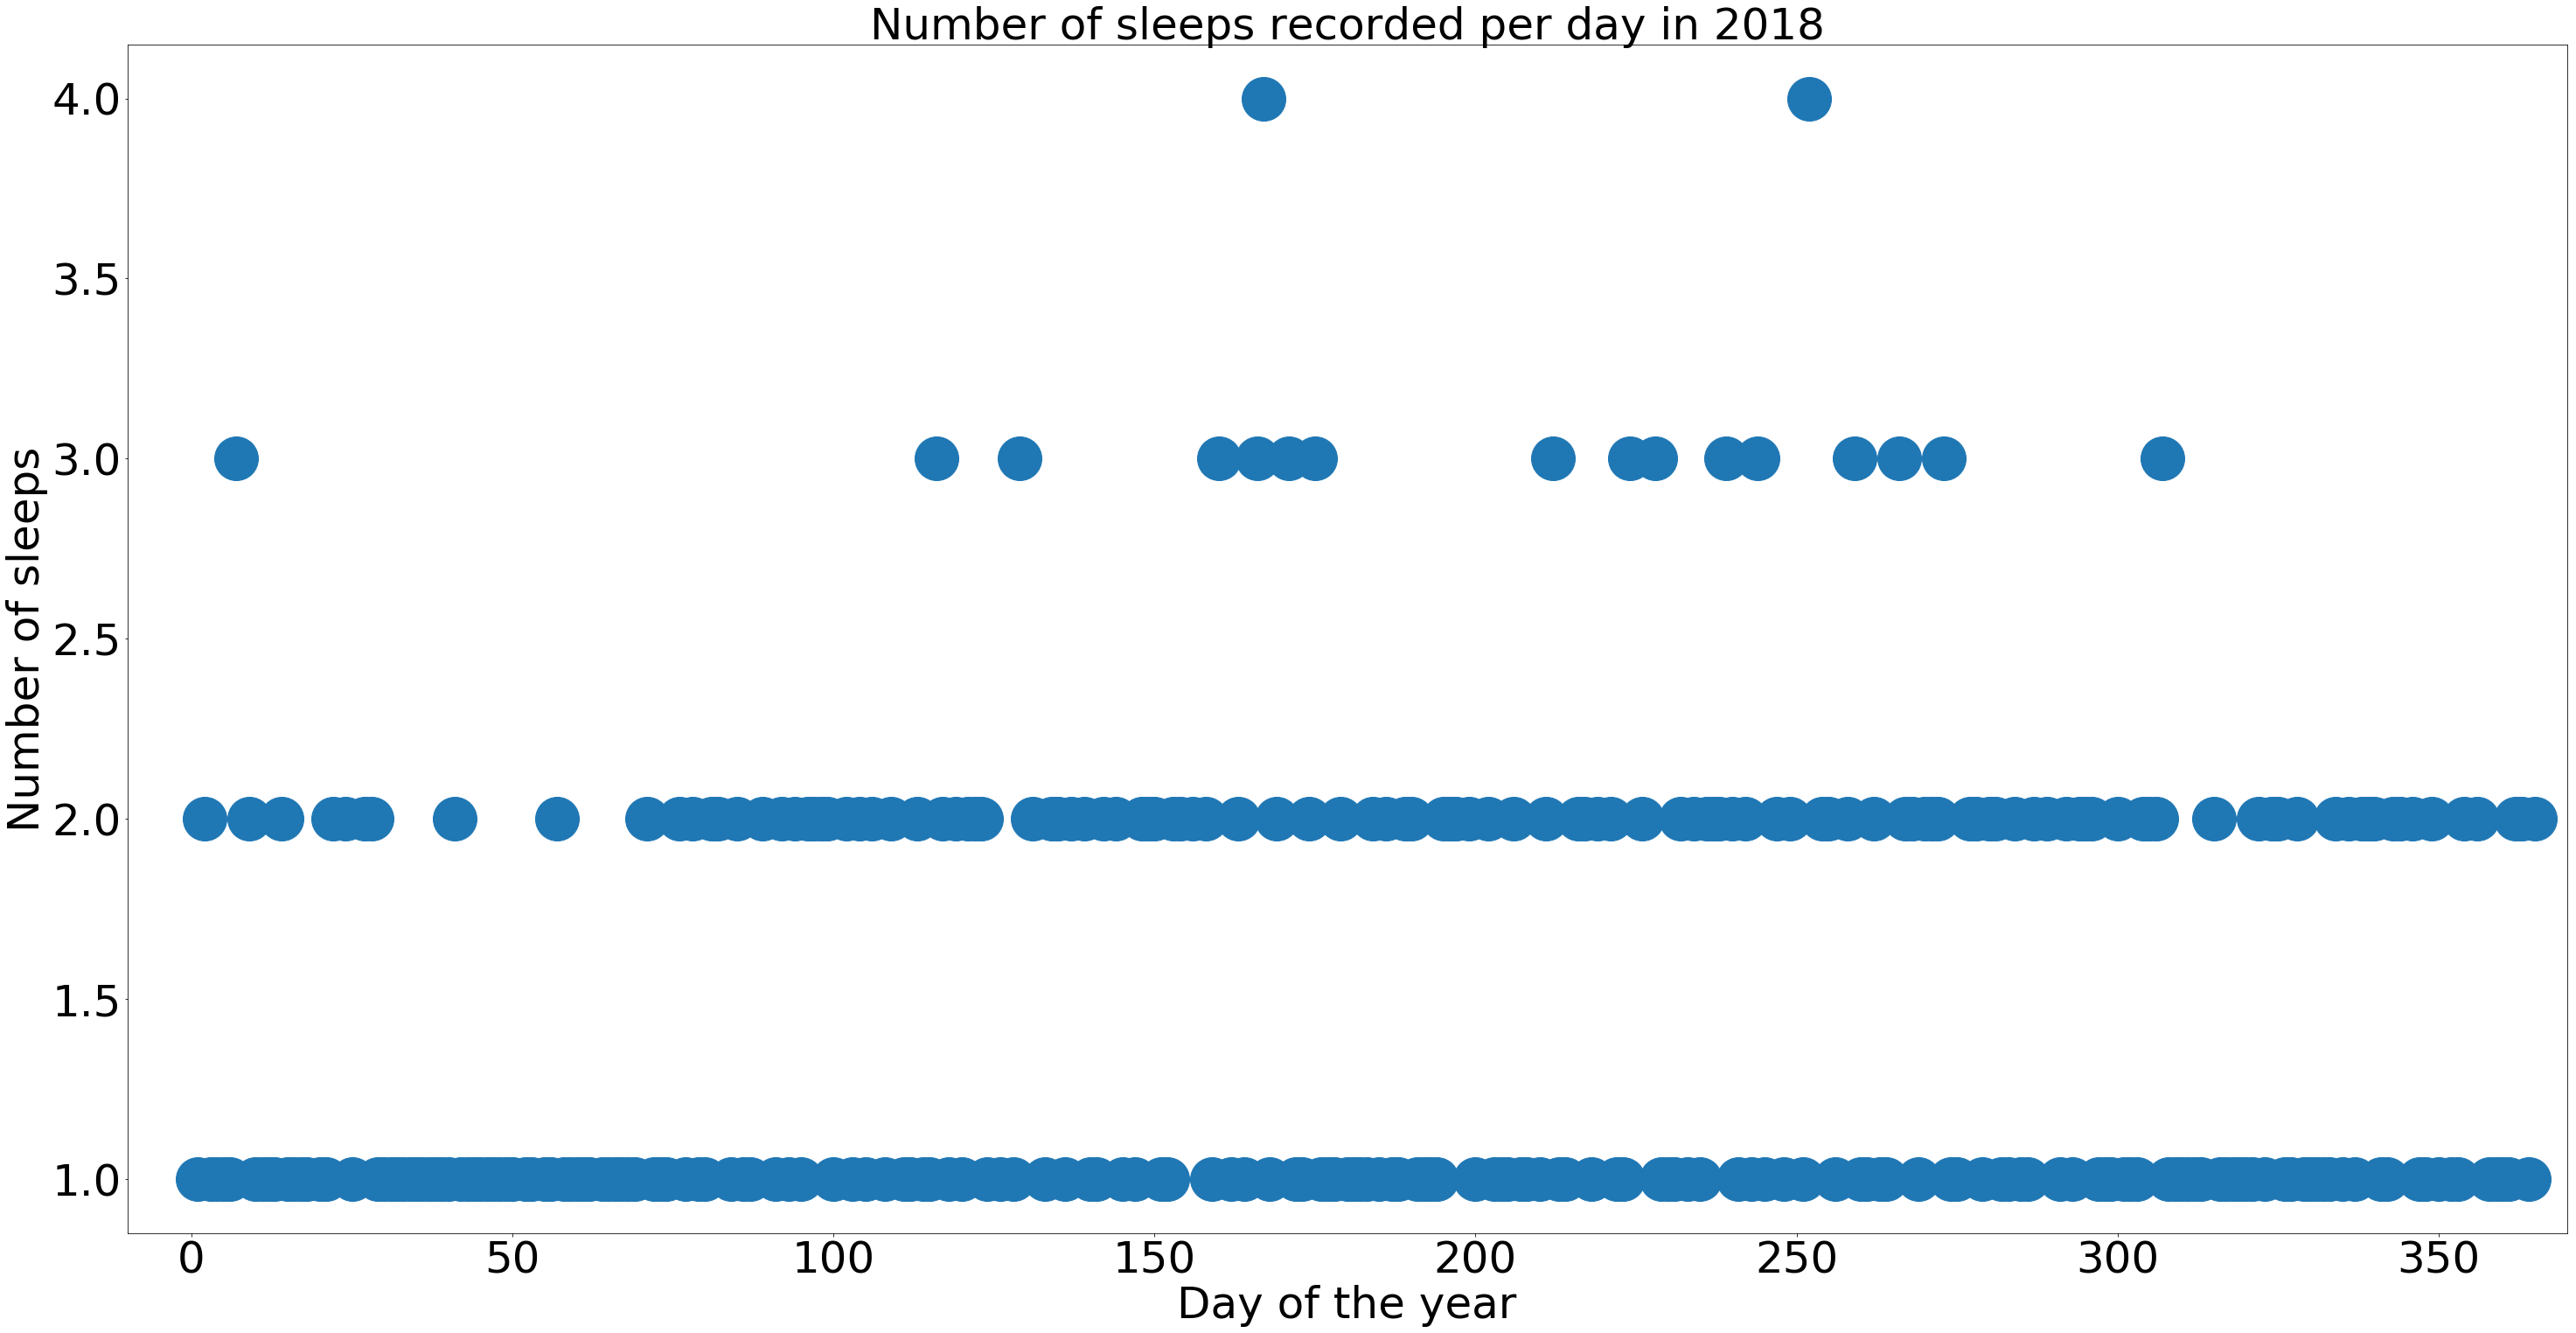

In [24]:
no_of_sleeps = df_sleep[df_sleep.year == 2018].groupby(['day_of_year']).count()['efficiency'] 
ax =no_of_sleeps.plot( figsize = (50,25),style='o', markersize=50,fontsize = 50)
ax.set_xlim(-10,370)
ax.set_title("Number of sleeps recorded per day in 2018",fontsize=50)
ax.set_ylabel("Number of sleeps", fontsize=50)
ax.set_xlabel("Day of the year", fontsize=50)

## Most days 1-2 sleeps are recorded by the instrument. 

Text(0.5, 0, 'Day of the year')

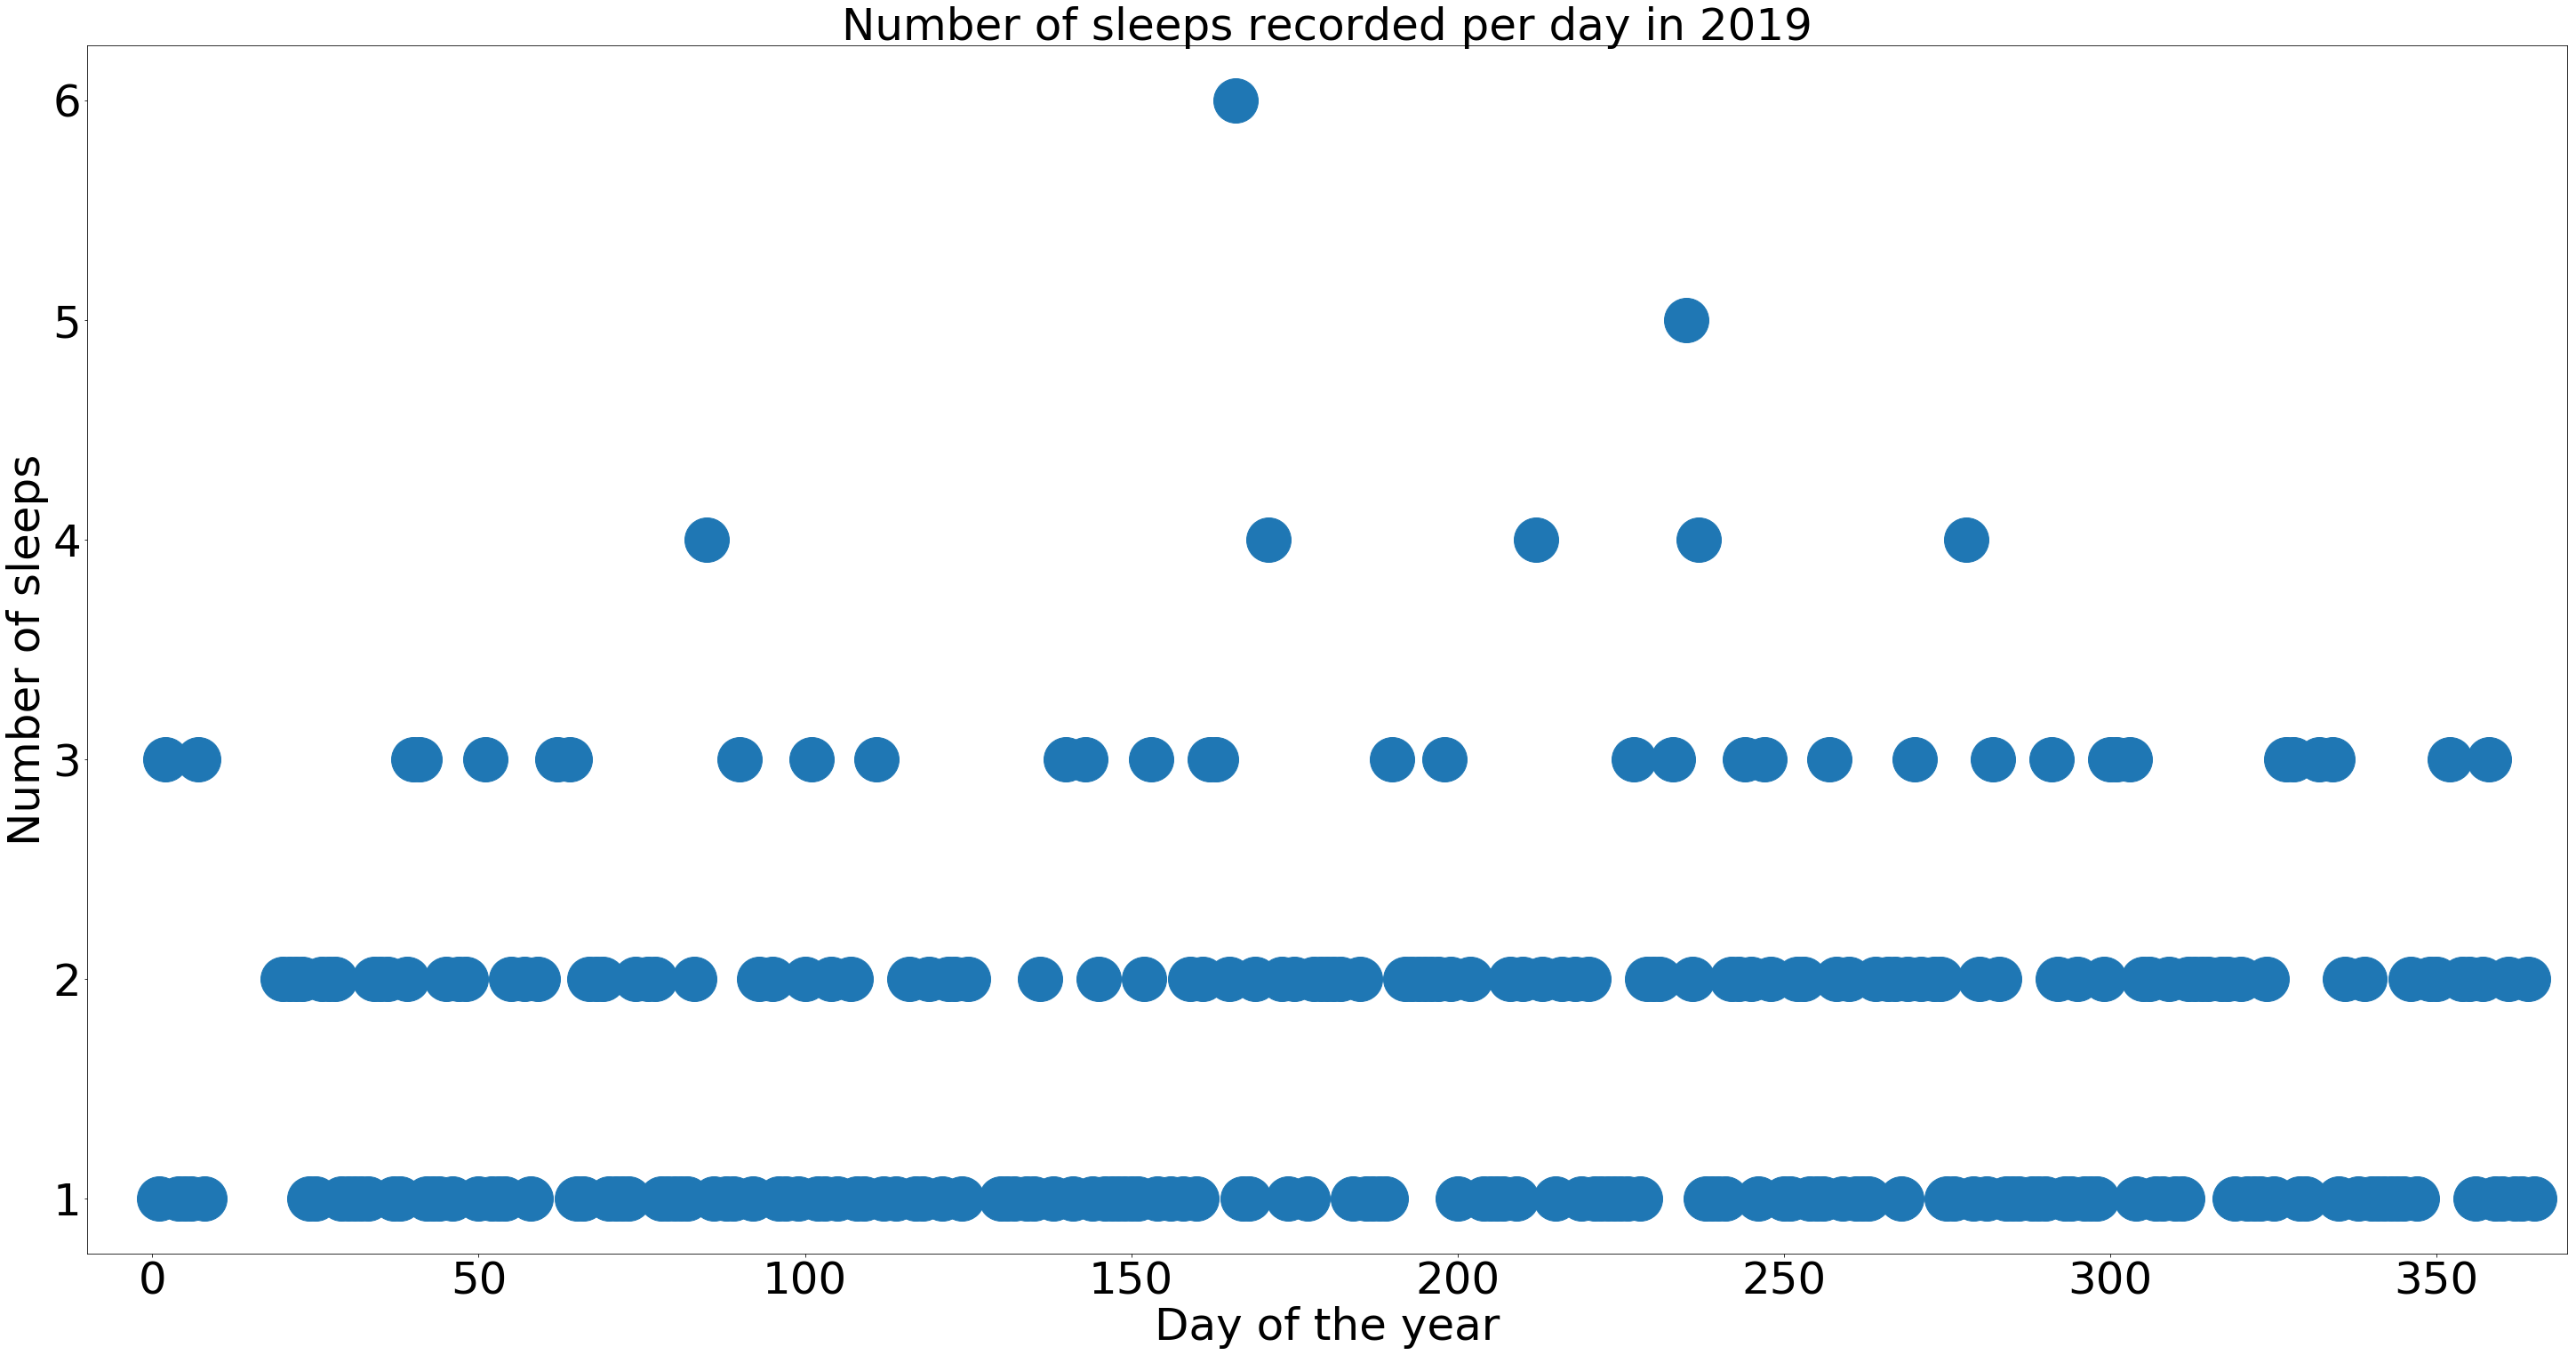

In [9]:
no_of_sleeps = df_sleep[df_sleep.year == 2019].groupby(['day_of_year']).count()['efficiency']
ax =no_of_sleeps.plot( figsize = (50,25),style='o', markersize=50,fontsize = 50)
ax.set_xlim(-10,370)
ax.set_title("Number of sleeps recorded per day in 2019",fontsize=50)
ax.set_ylabel("Number of sleeps", fontsize=50)
ax.set_xlabel("Day of the year", fontsize=50)

## More number of sleeps were recorded in the years after 2018. This could indicate two possibilities, 1. The accuracy of the instruments reduced (if so, it would have affected the other data such in those years too) 2. More likely, the user had more interrupted sleep in 2019 and 2020. 

# How good is the instrument in calculating the efficiency of the sleep? Plotting sleep efficiency versus the sleep duration

Text(0, 0.5, 'Efficiency of sleep')

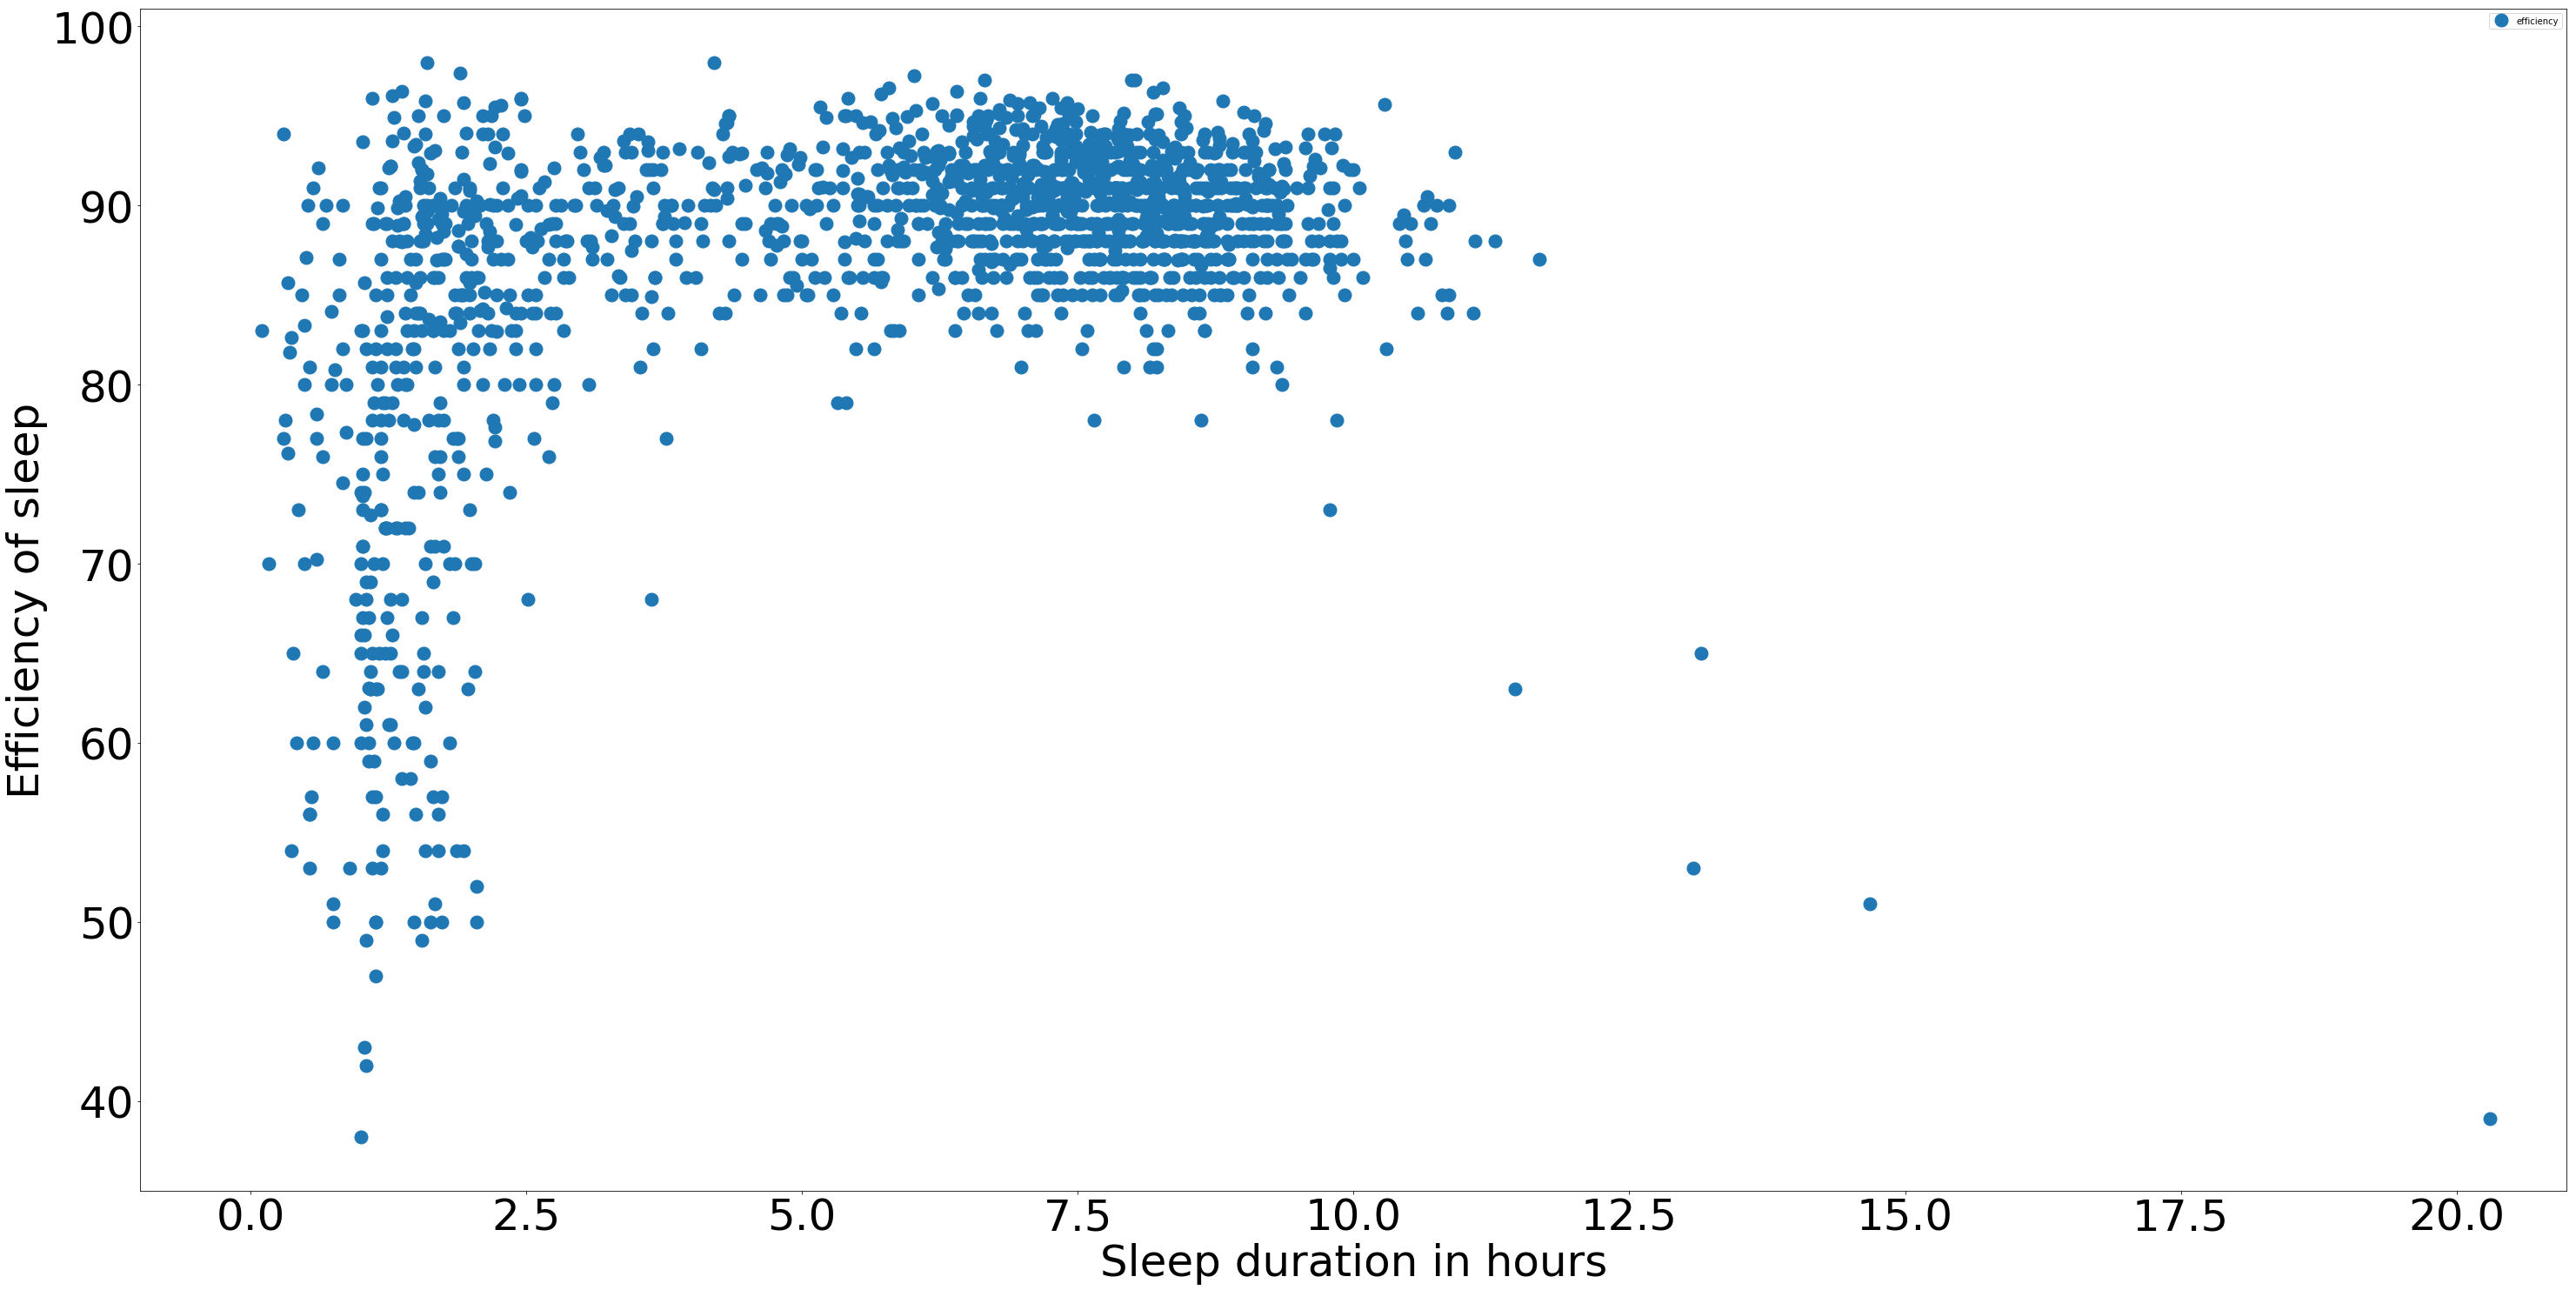

In [11]:
ax = df_sleep.plot(x='sleep_time', y='efficiency', figsize = (50,25),style='o', markersize=15,fontsize = 50) #plotting
ax.set_xlim(-1,21)
ax.set_xlabel("Sleep duration in hours",fontsize = 50)
ax.set_ylabel("Efficiency of sleep",fontsize = 50)


## From the plot it is clear that the efficiency is not an accurate measure at low duration of sleep. There is a wide spread in the efficiency when the sleep duration is below 5 hours. 

# Plotting the total hours slept in a day of the year

Text(0.5, 0, 'Day of the year')

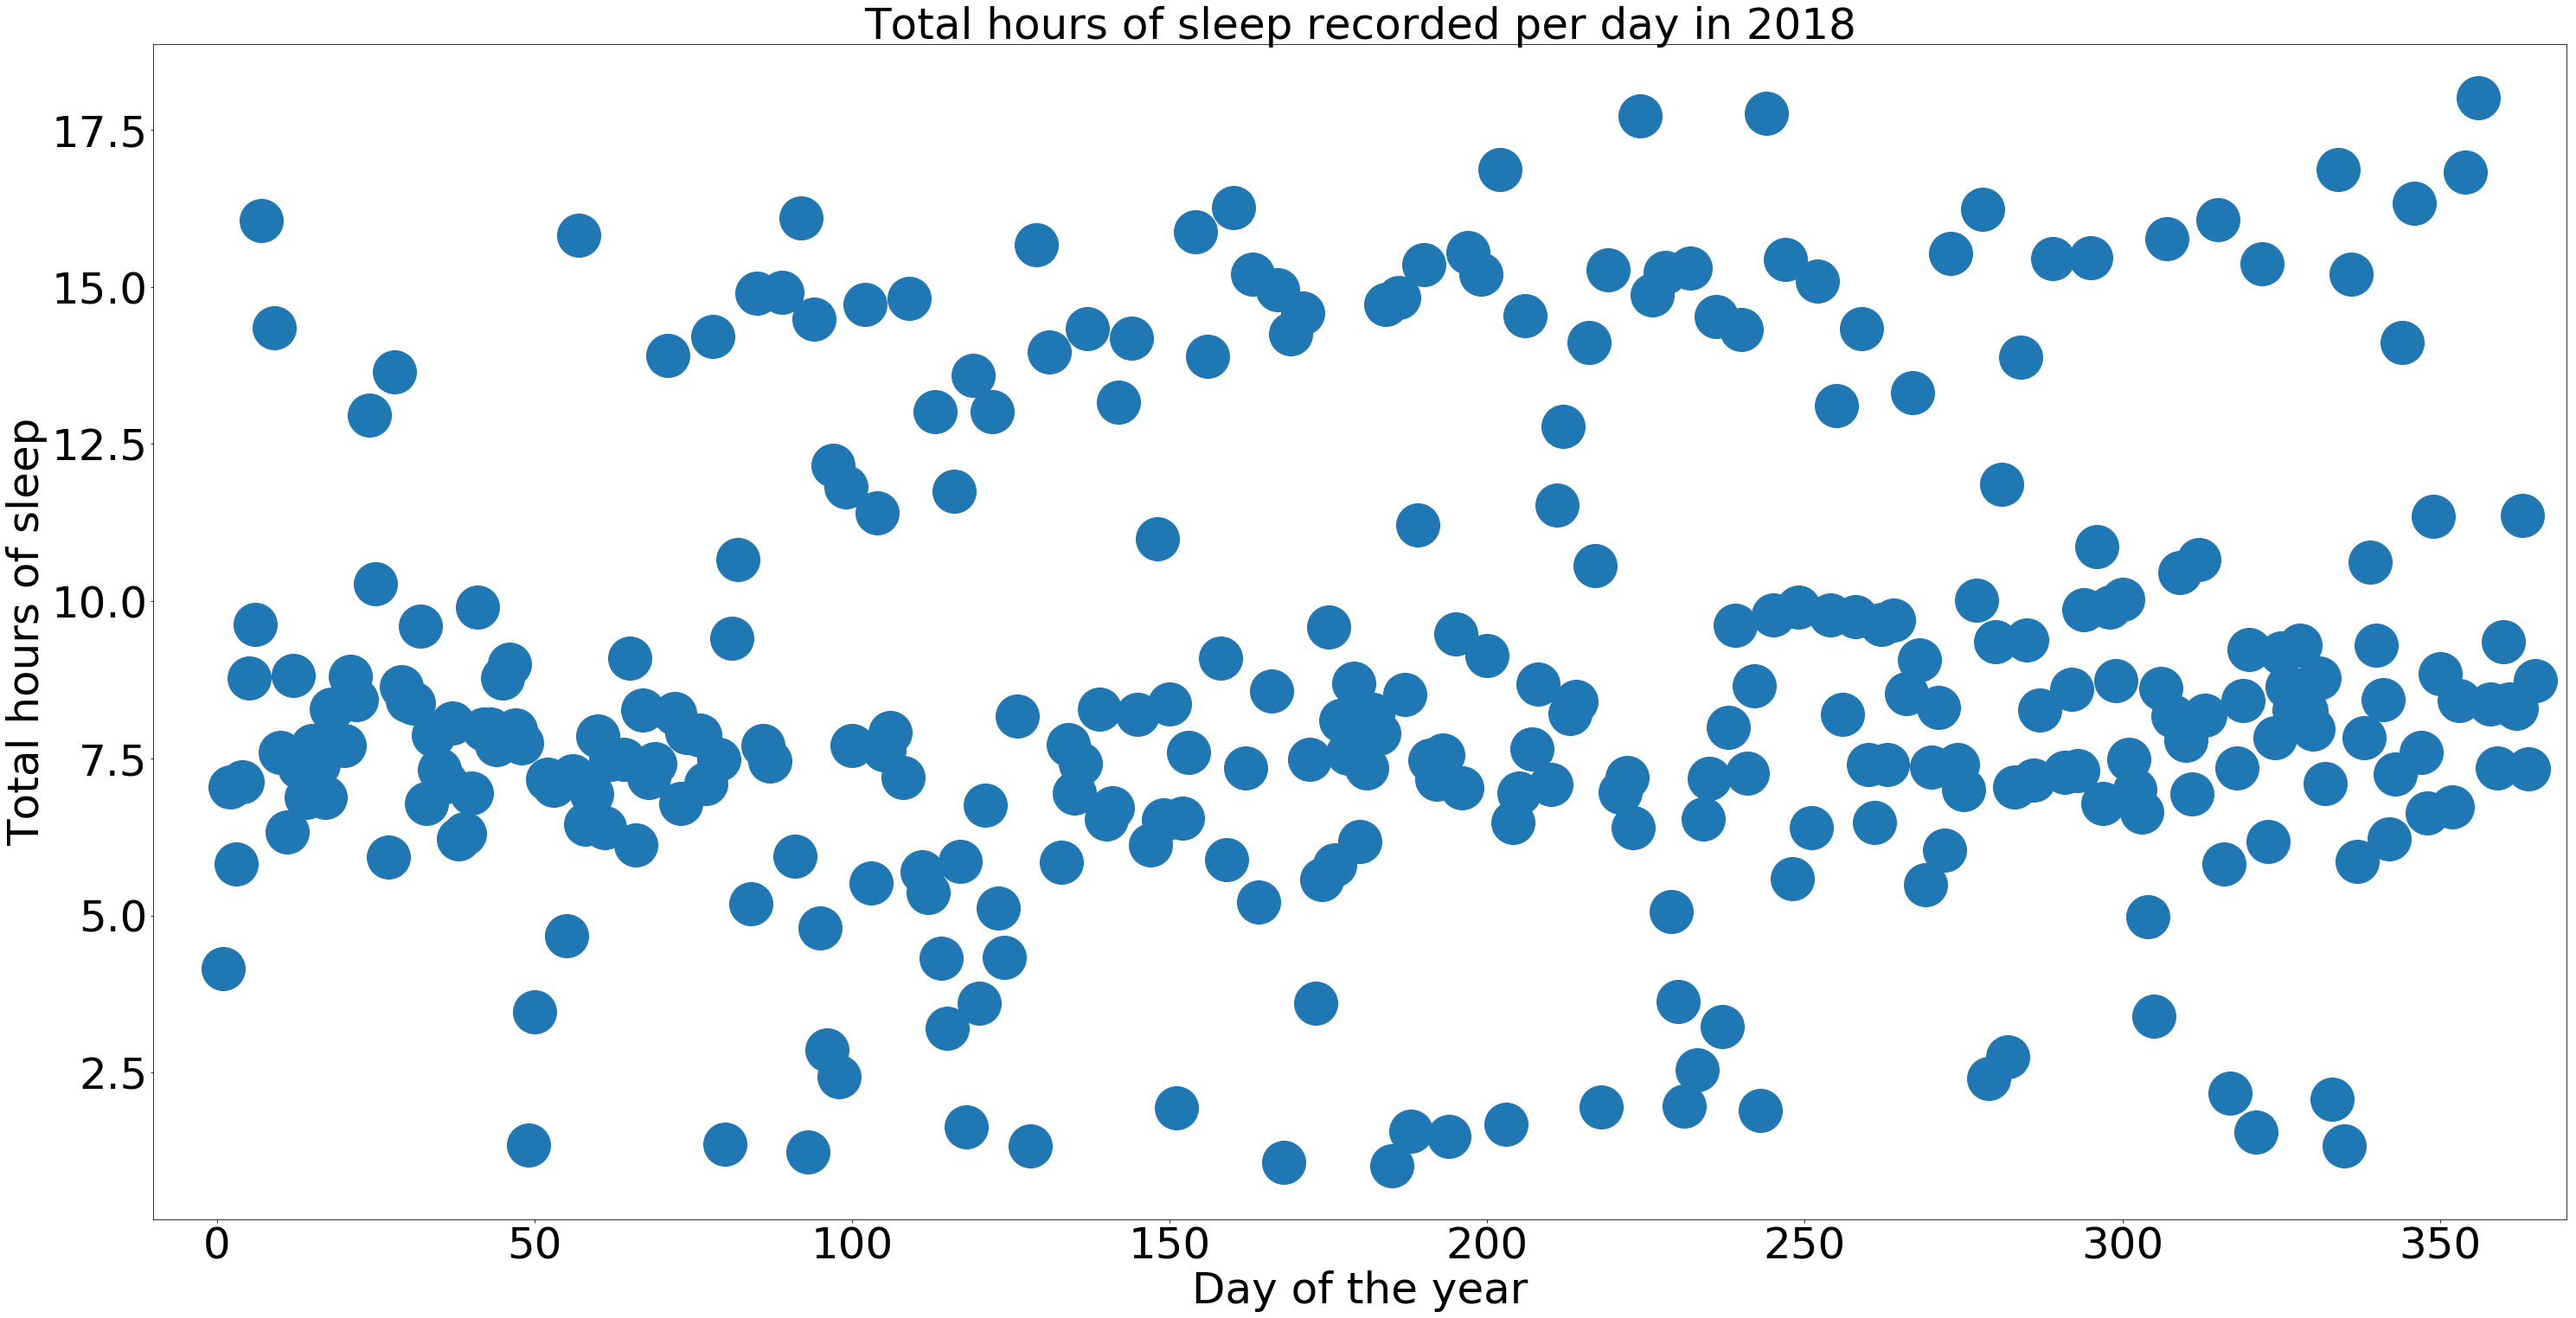

In [12]:
total_sleep_time = df_sleep[df_sleep.year == 2018].groupby(['day_of_year']).sum()['sleep_time']

ax = total_sleep_time.plot( figsize = (50,25),style='o', markersize=50,fontsize = 50)
ax.set_xlim(-10,370)
ax.set_title("Total hours of sleep recorded per day in 2018",fontsize=50)
ax.set_ylabel("Total hours of sleep", fontsize=50)
ax.set_xlabel("Day of the year", fontsize=50)

Text(0.5, 0, 'Day of the year')

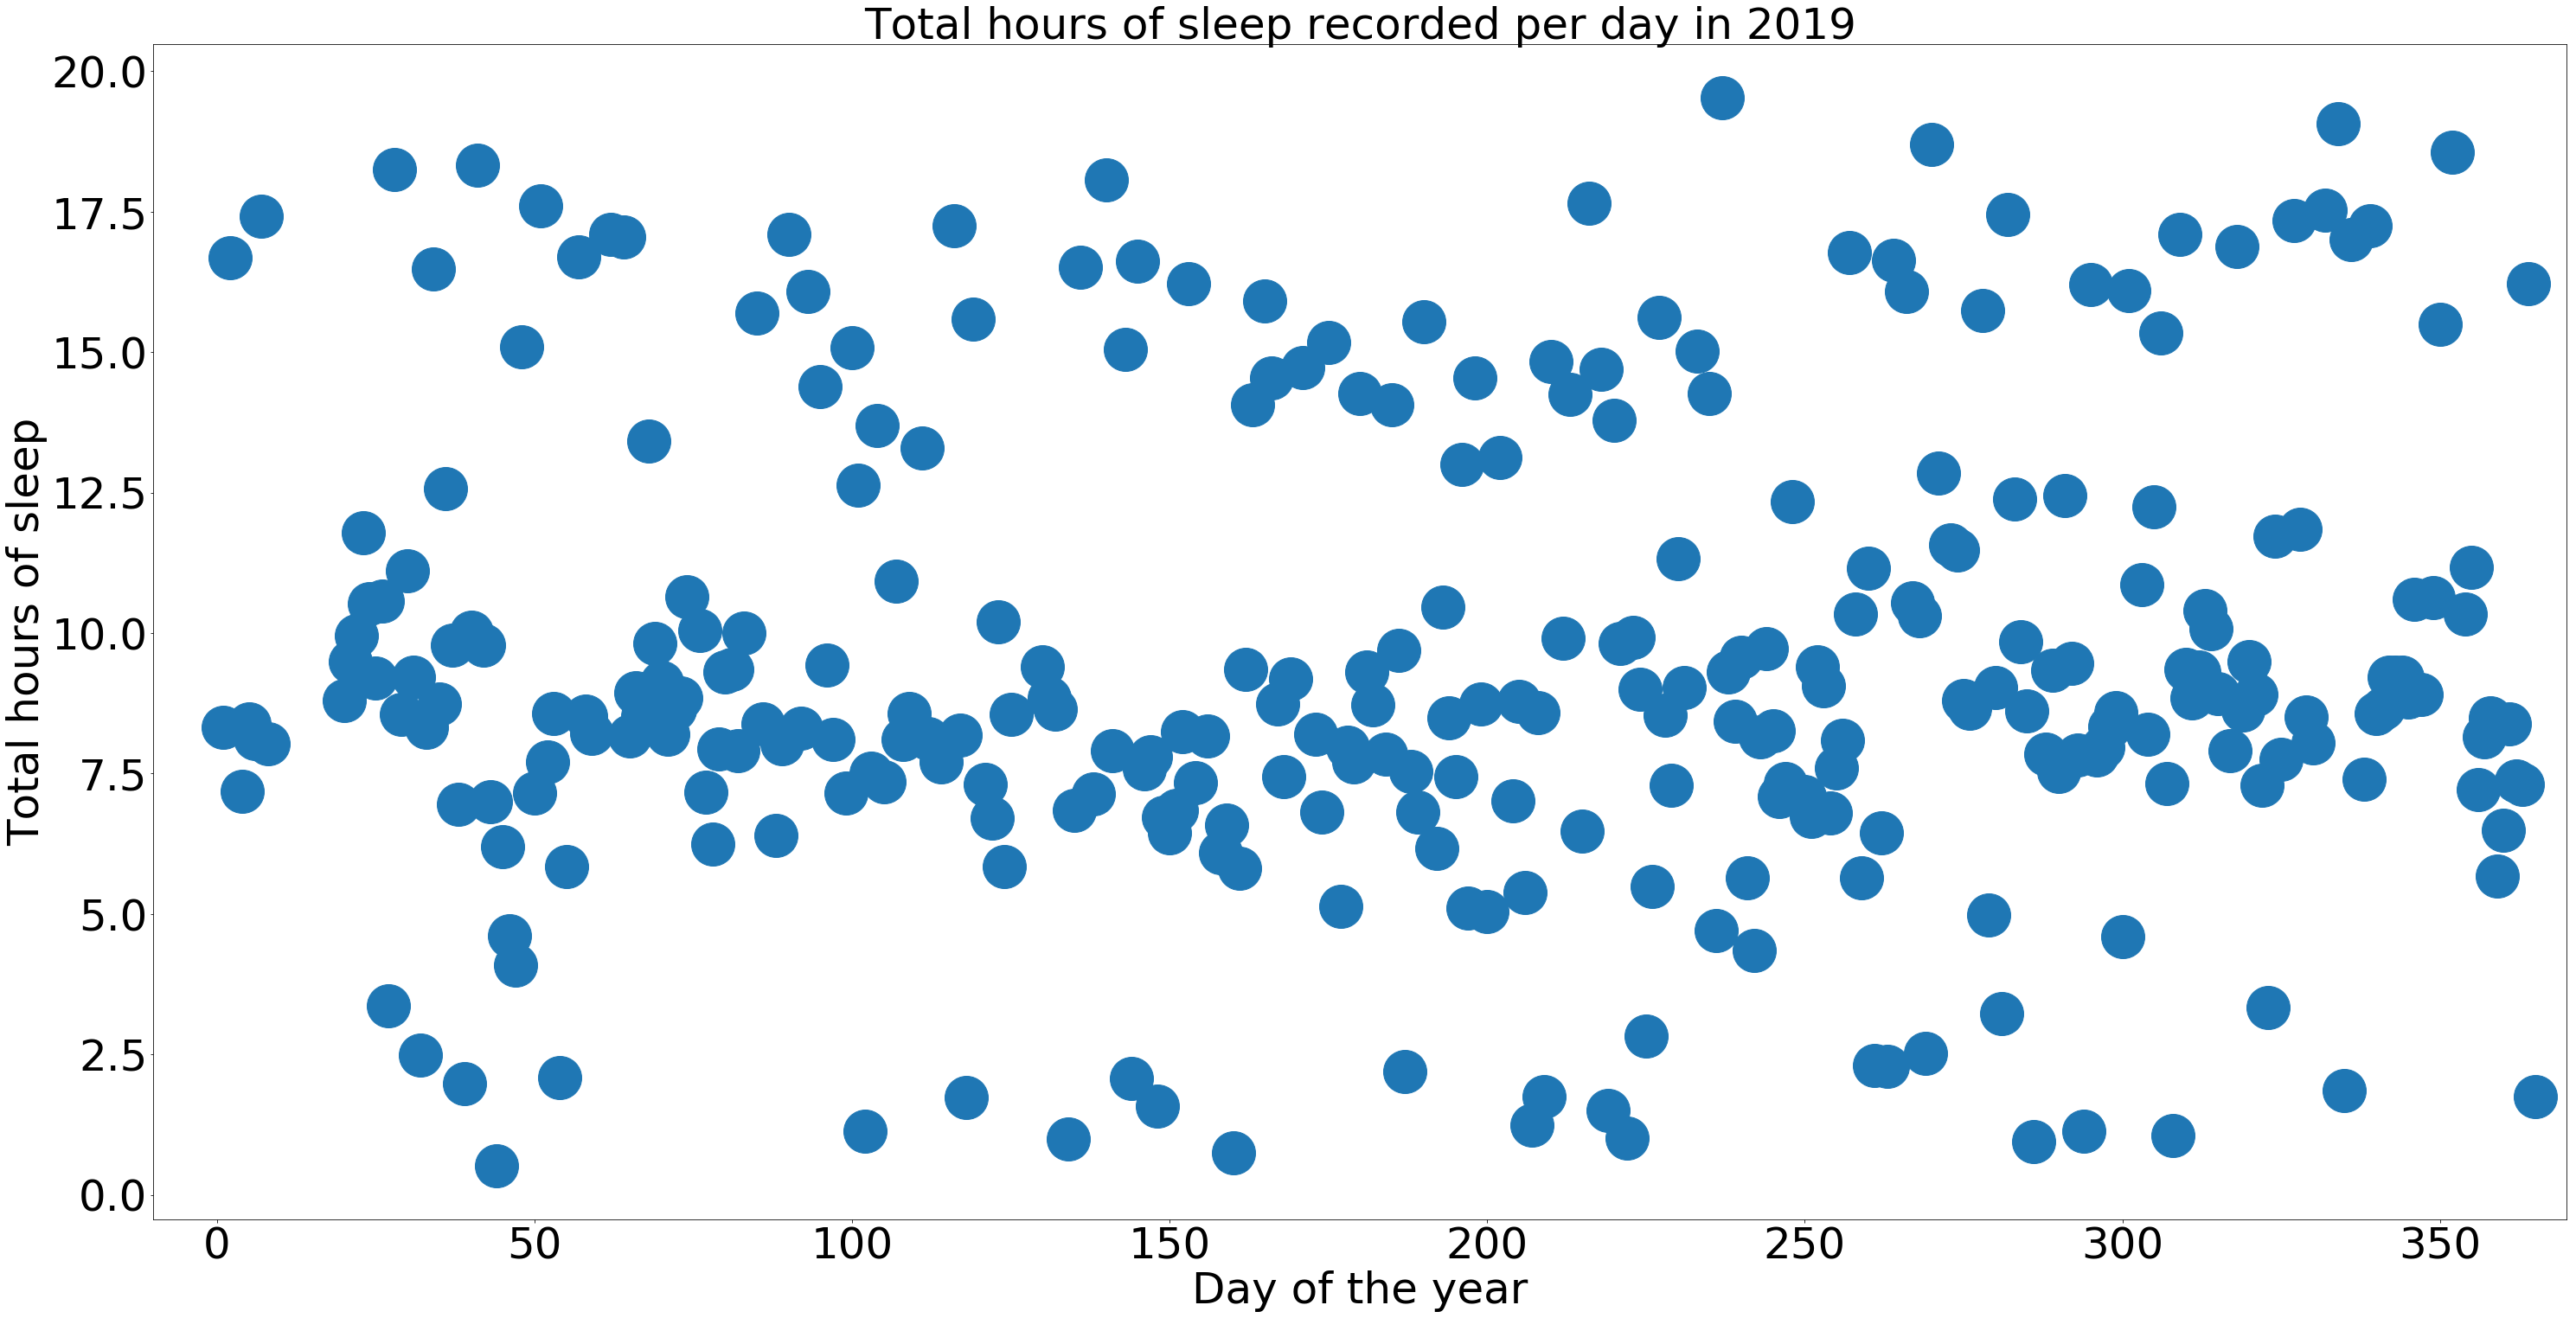

In [13]:
total_sleep_time = df_sleep[df_sleep.year == 2019].groupby(['day_of_year']).sum()['sleep_time']

ax = total_sleep_time.plot( figsize = (50,25),style='o', markersize=50,fontsize = 50)
ax.set_xlim(-10,370)
ax.set_title("Total hours of sleep recorded per day in 2019",fontsize=50)
ax.set_ylabel("Total hours of sleep", fontsize=50)
ax.set_xlabel("Day of the year", fontsize=50)

## There is a widespread in the number of the hours slept. The user does not have variation between the years. 

# What is the common bedtime hour of the user?

Text(0, 0.5, 'Counts')

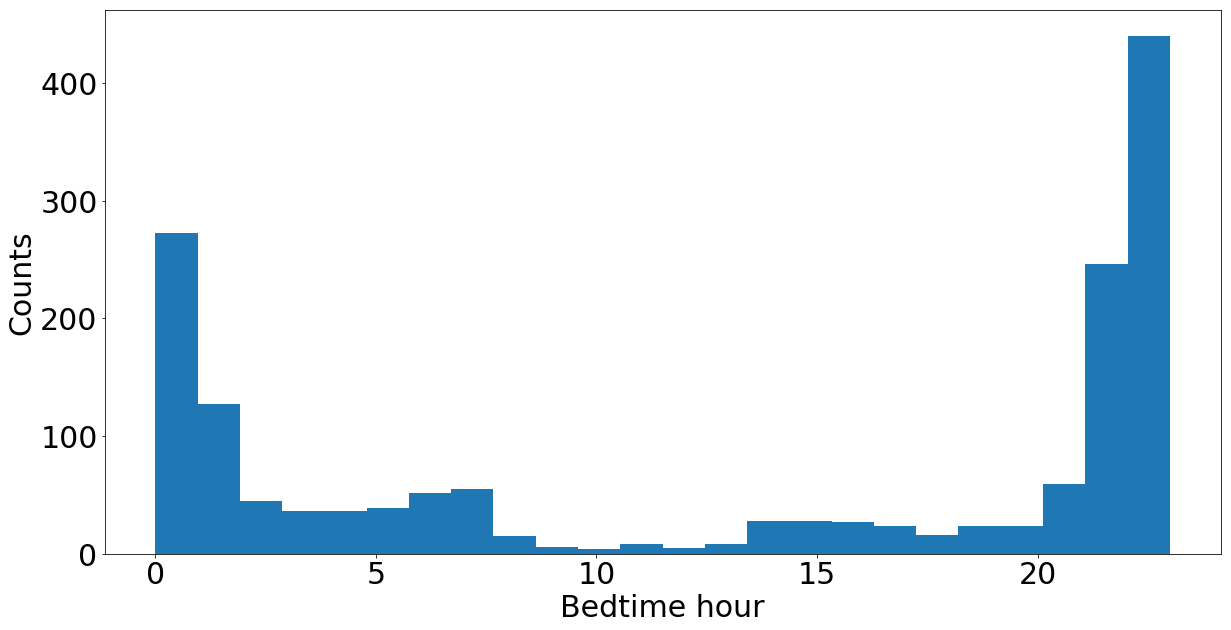

In [47]:
df_sleep['start_hour'] =df_sleep['actual_start_time'].dt.hour #converting time

df_sleep['end_hour'] = df_sleep['actual_end_time'].dt.hour

ax = df_sleep['start_hour'].plot.hist(bins=24,figsize = (20,10),fontsize = 30)
ax.set_xlabel("Bedtime hour",fontsize = 30)
ax.set_ylabel("Counts",fontsize = 30)


## There is two sets of common bedtime hour for the user. One is closer to midnight and the other is daytime. The daytime sleeps could be naps in the day when not combined with the night time sleep

# A better inerpretation of the bedtime hour can be made if we consider a day to be from noon to noon. Meaning, the midnight would be at 24 hours. 

Text(0, 0.5, 'Counts')

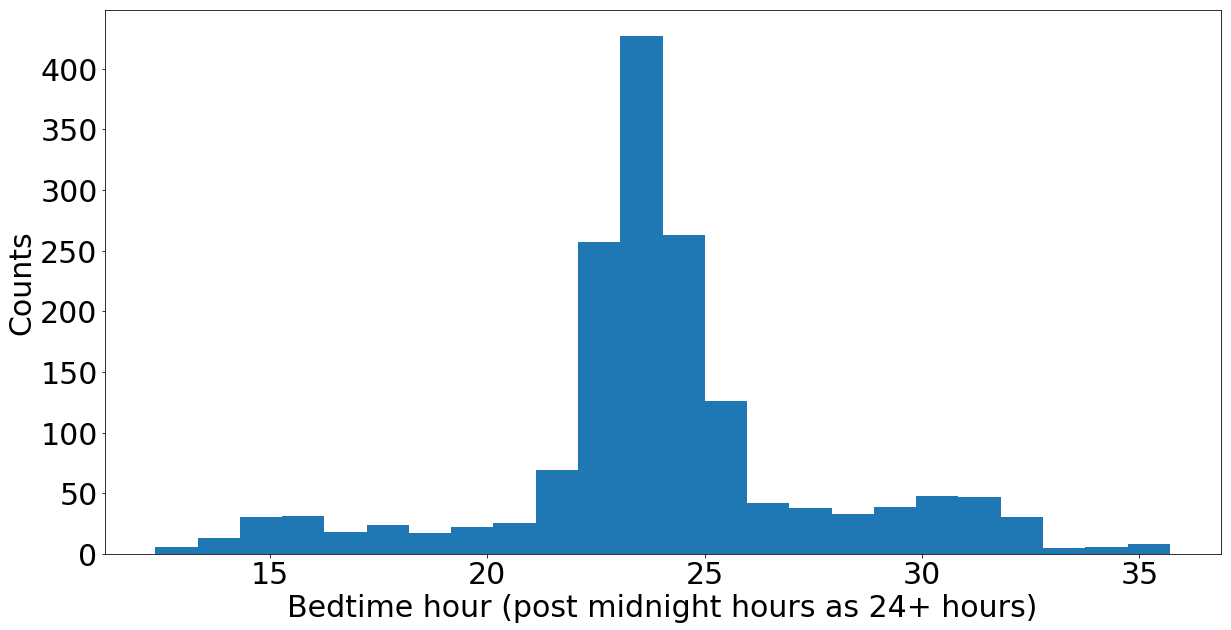

In [14]:
ax = df_sleep['bedtime'].plot.hist(bins=24,figsize = (20,10),fontsize = 30)
ax.set_xlabel("Bedtime hour (post midnight hours as 24+ hours)",fontsize = 30)
ax.set_ylabel("Counts",fontsize = 30)

## It can be seen here that the user usually goes to bed at midnight. 

# Does the month of the year affect the sleep duration? 

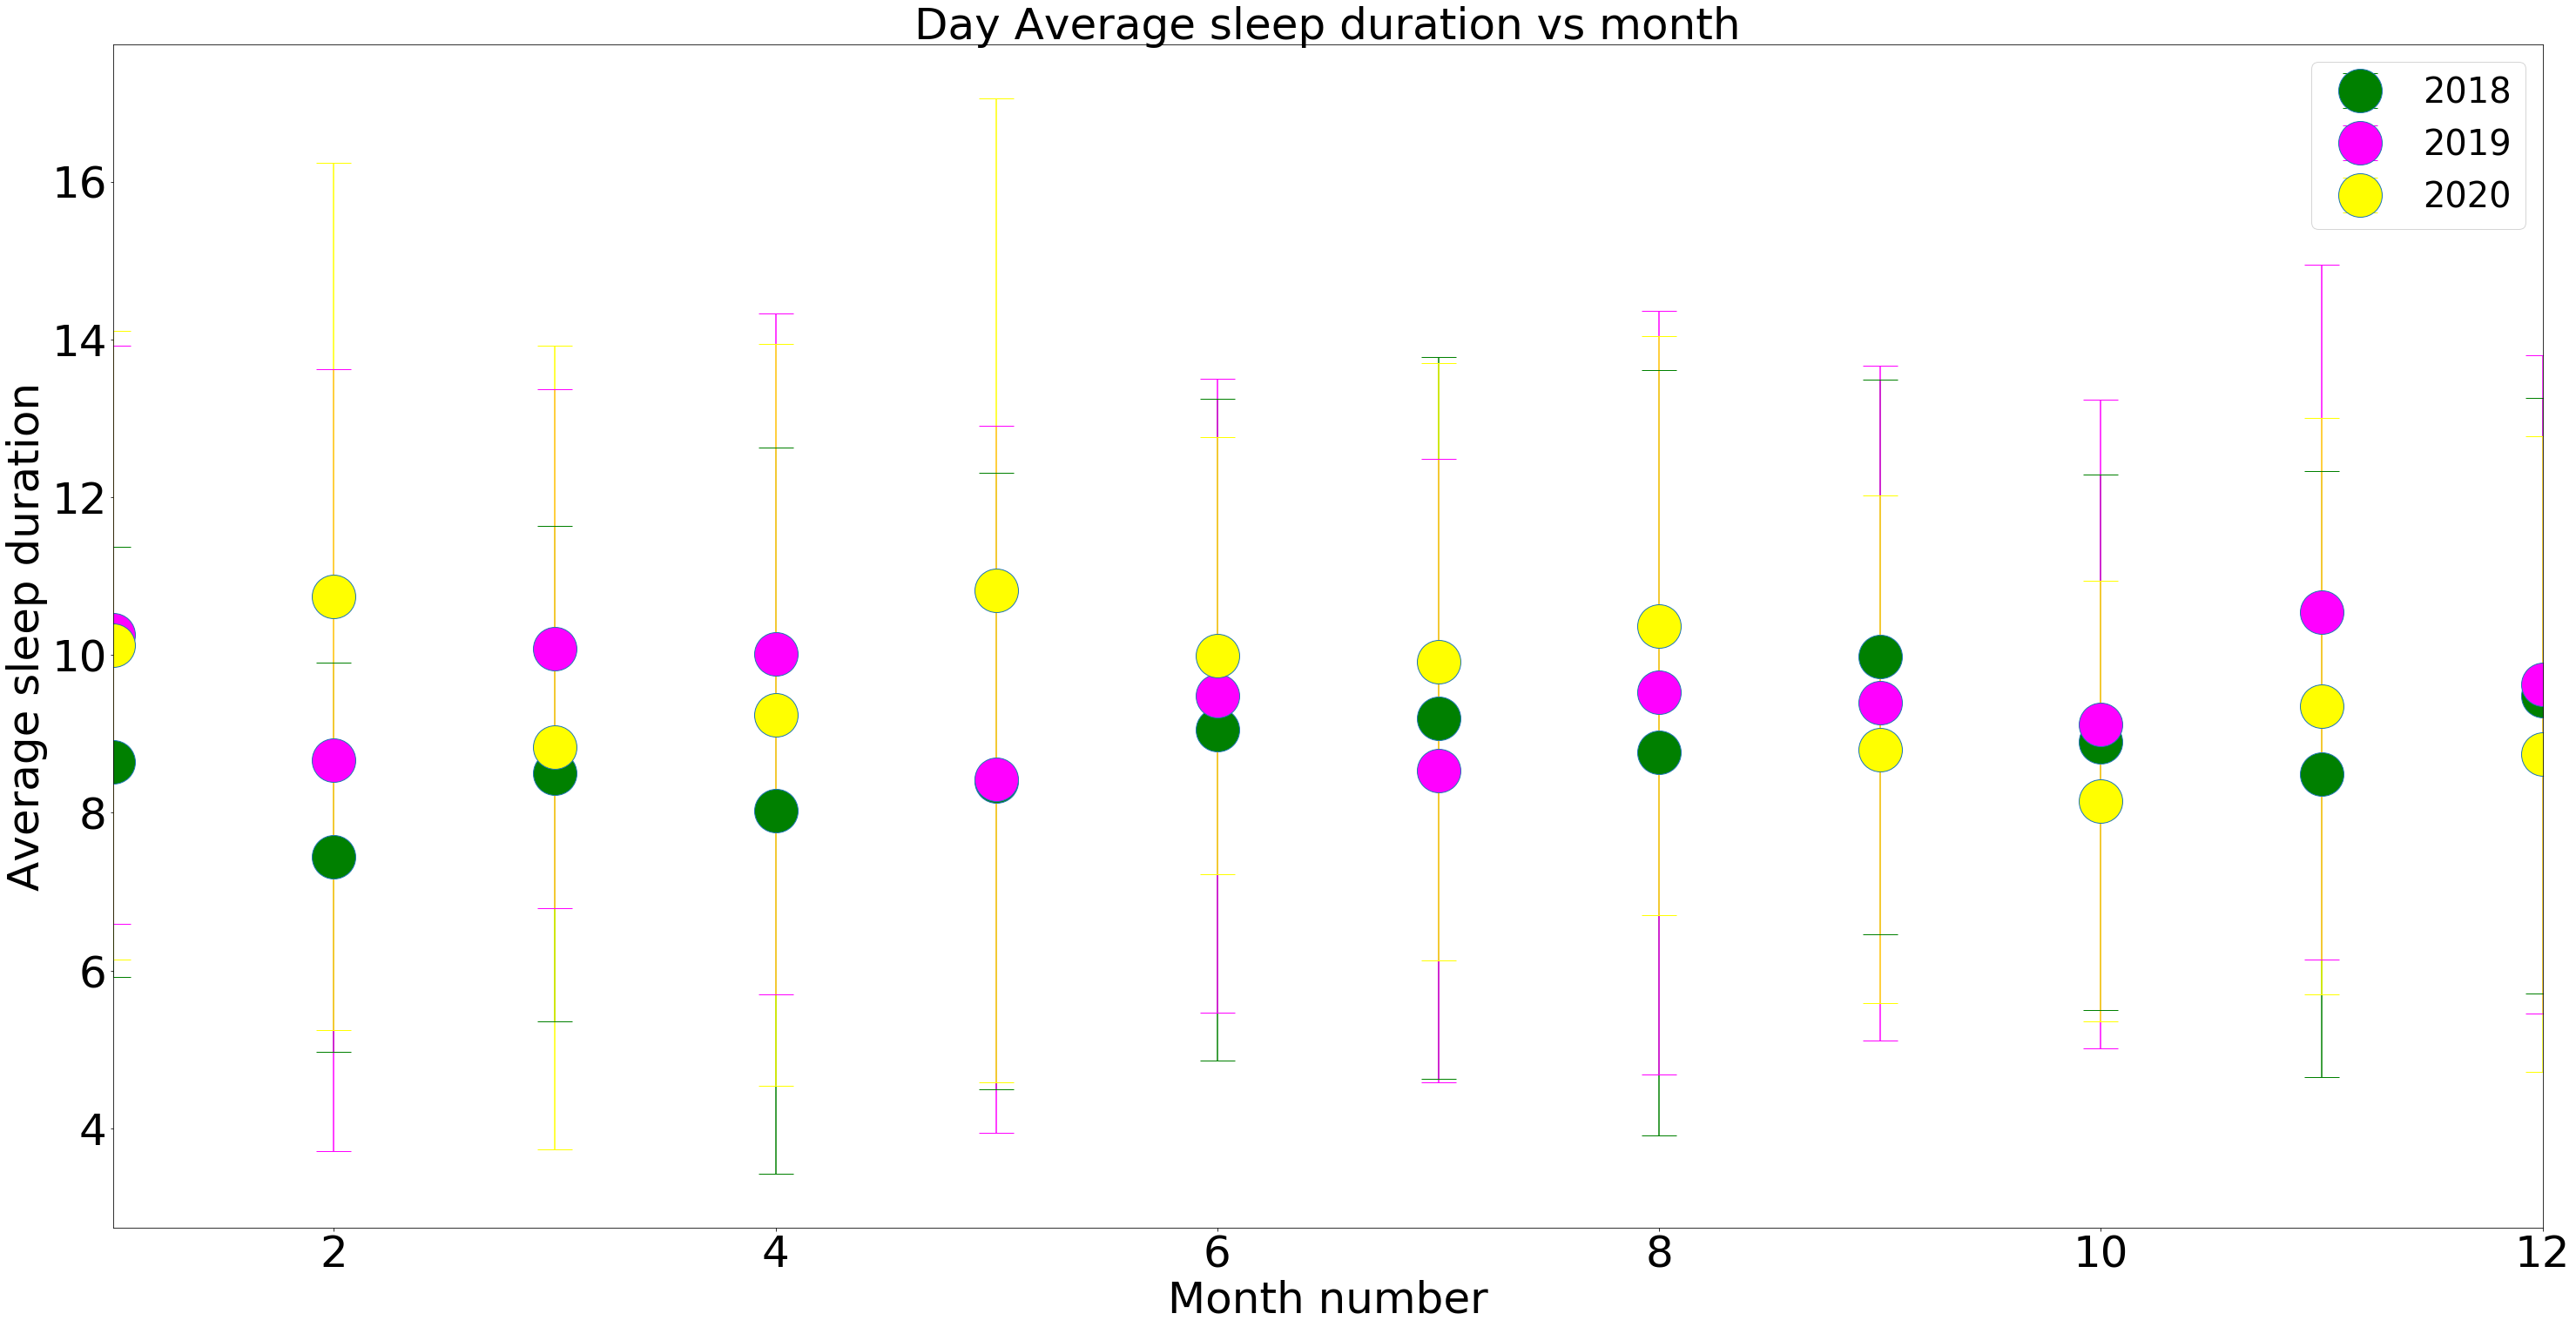

In [8]:
# Average sleep duration for 2018
average_sleep_by_month = df_sleep[df_sleep.year == 2018].groupby(['day_of_year', 'month_id'])['sleep_time'].sum()
err = average_sleep_by_month.groupby('month_id').std()
average_sleep_by_month = average_sleep_by_month.groupby('month_id').mean()
ax = average_sleep_by_month.plot(yerr = err,fmt='o', figsize = (50,25),style='o',mfc ='Green', ms=50,fontsize = 50,ecolor='Green',
       capsize=20)
# Average sleep duration for 2019
average_sleep_by_month = df_sleep[df_sleep.year == 2019].groupby(['day_of_year', 'month_id'])['sleep_time'].sum()
err = average_sleep_by_month.groupby('month_id').std()
average_sleep_by_month = average_sleep_by_month.groupby('month_id').mean()
ax = average_sleep_by_month.plot(yerr = err,fmt='o', figsize = (50,25),style='o',mfc ='Magenta', ms=50,fontsize = 50,ecolor='Magenta',
       capsize=20)

# Average sleep duration for 2020
average_sleep_by_month = df_sleep[df_sleep.year == 2020].groupby(['day_of_year', 'month_id'])['sleep_time'].sum()
err = average_sleep_by_month.groupby('month_id').std()
average_sleep_by_month = average_sleep_by_month.groupby('month_id').mean()
ax = average_sleep_by_month.plot(yerr = err,fmt='o', figsize = (50,25),style='o',mfc ='Yellow', ms=50,fontsize = 50,ecolor='Yellow',
       capsize=20)

ax.set_title("Day Average sleep duration vs month",fontsize=50)
ax.set_ylabel("Average sleep duration", fontsize=50)
ax.set_xlabel("Month number", fontsize=50)

ax.legend(['2018', '2019', '2020'],loc='best', ncol=1,fontsize = 40)

## The errors on the average sleep duration overlap across the years. There is no pattern in the sleep duration of the user with respect to the month of the year or the year. 

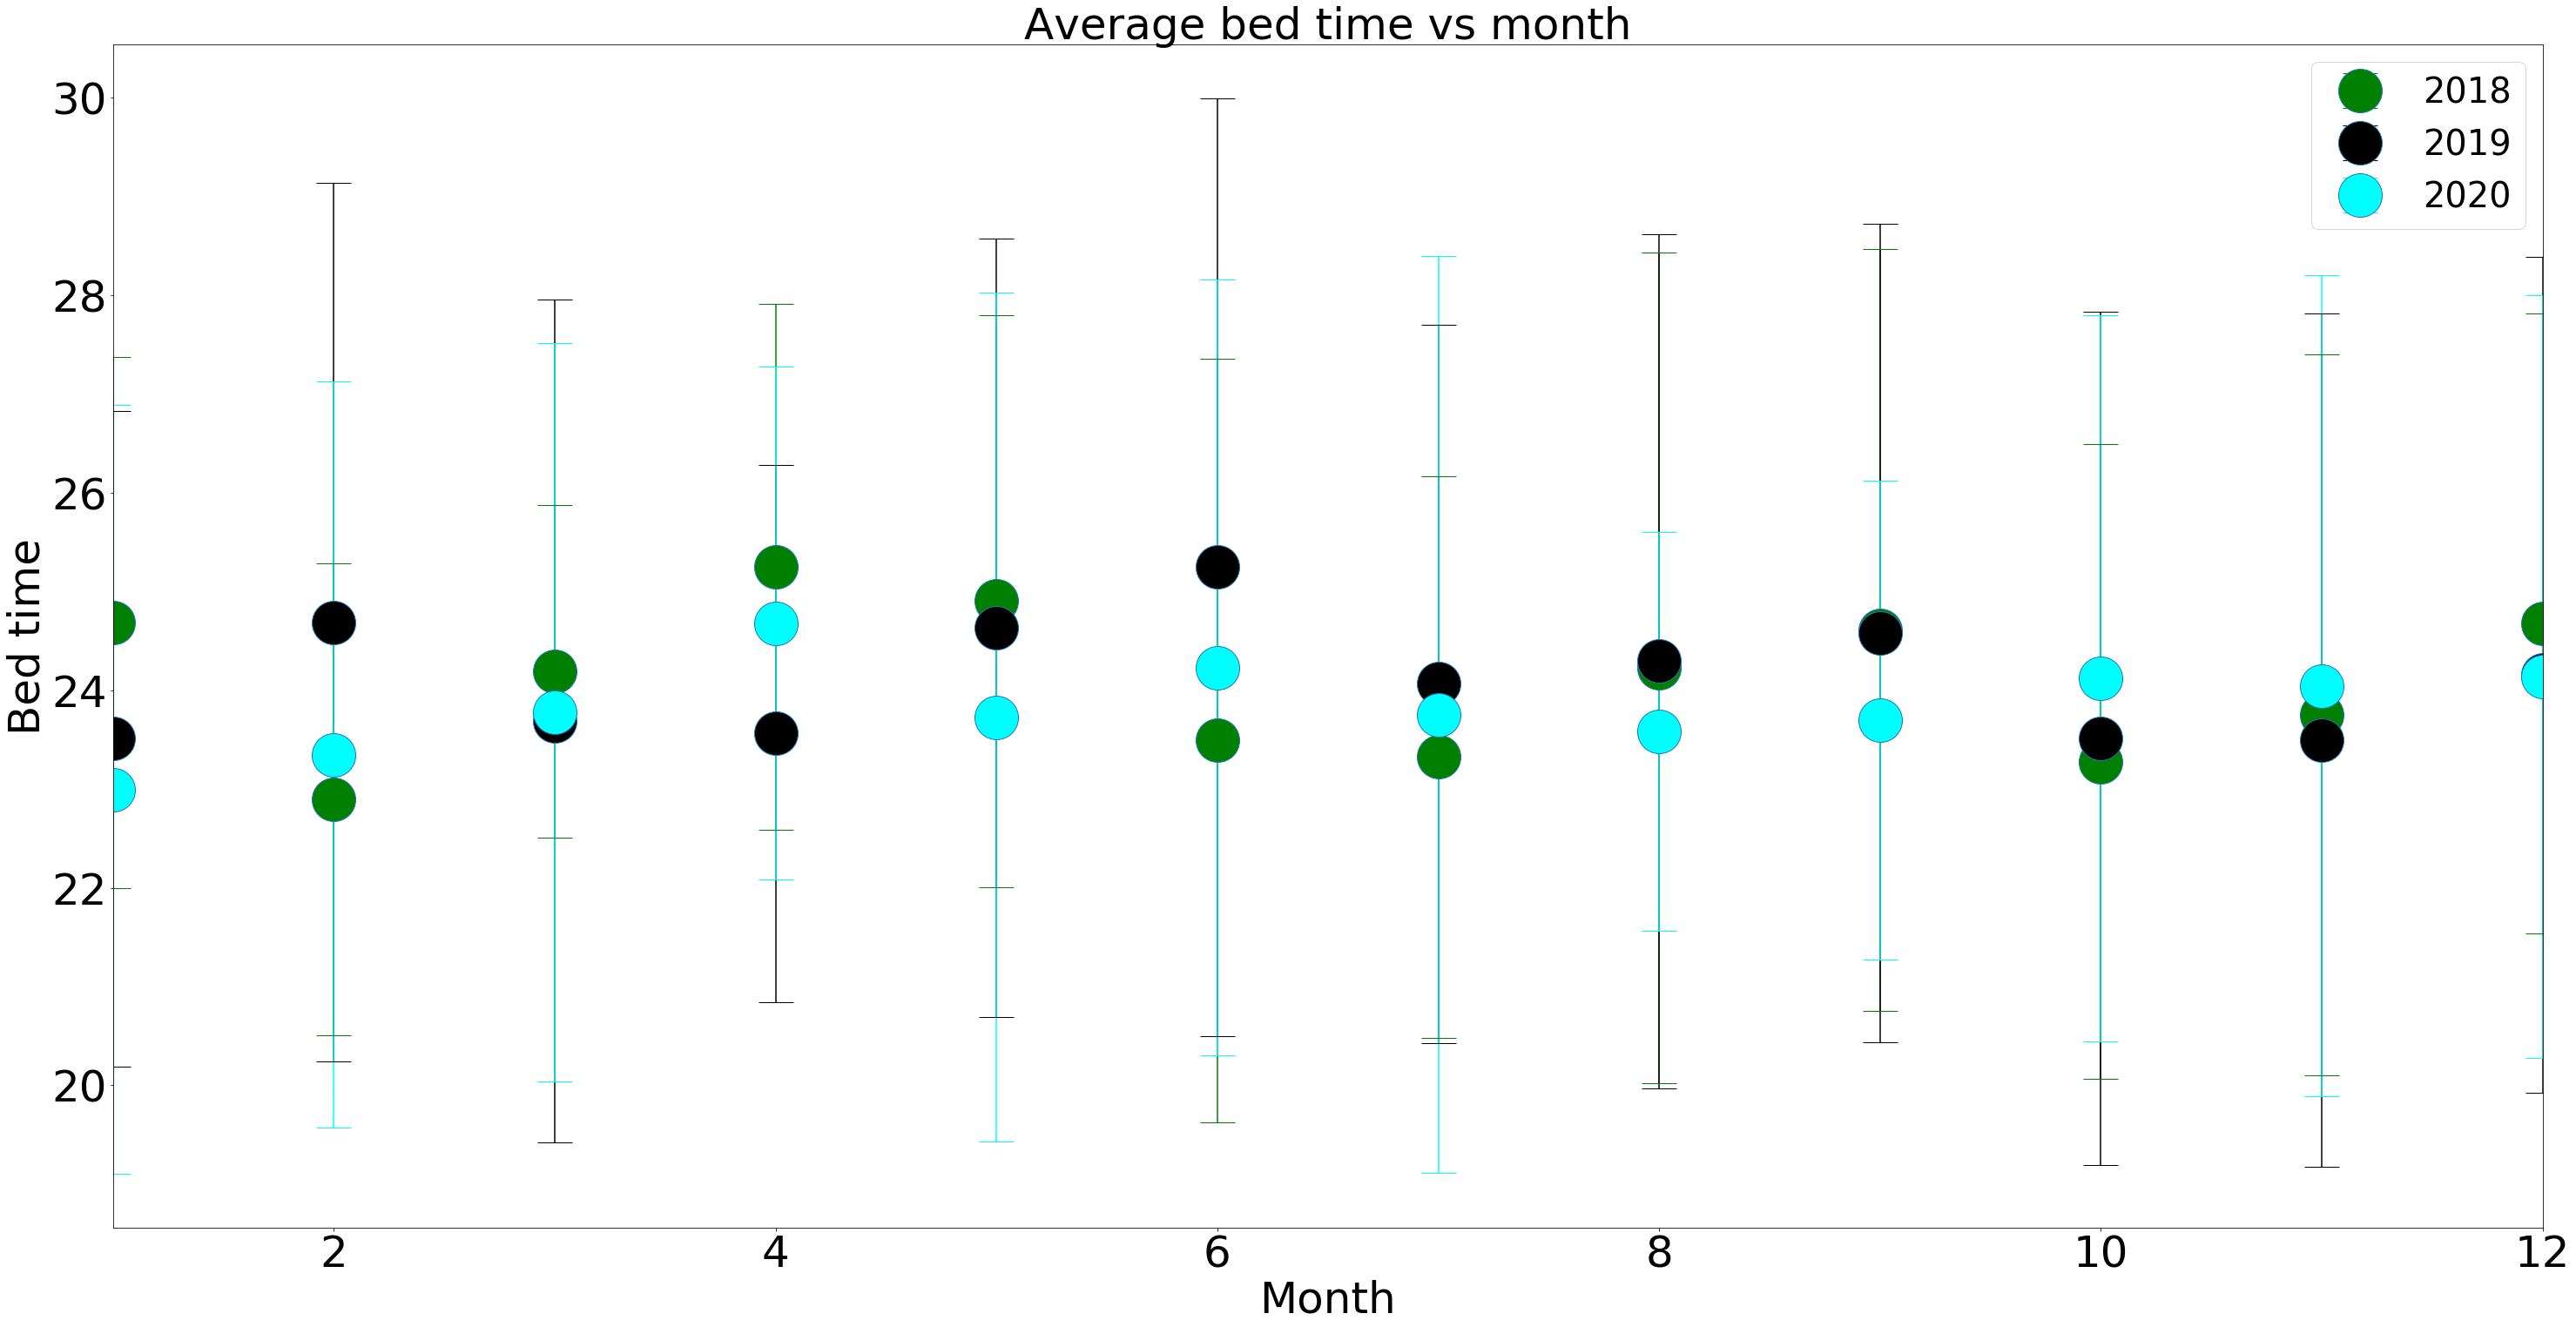

In [52]:
#Average bed time in a month of the year

mean_bedtime = df_sleep[df_sleep.year == 2018].groupby(['month_id']).mean()['bedtime']
err = df_sleep[df_sleep.year == 2018].groupby(['month_id']).std()['bedtime']

ax = mean_bedtime.plot( yerr = err,fmt='o', figsize = (50,25),style='o',mfc ='Green', ms=50,fontsize = 50,ecolor='Green',
       capsize=20)

mean_bedtime = df_sleep[df_sleep.year == 2019].groupby(['month_id']).mean()['bedtime']
err = df_sleep[df_sleep.year == 2019].groupby(['month_id']).std()['bedtime']

ax = mean_bedtime.plot( yerr = err,fmt='o', figsize = (50,25),style='o',mfc ='Black', ms=50,fontsize = 50,ecolor='Black',
       capsize=20)


mean_bedtime = df_sleep[df_sleep.year == 2020].groupby(['month_id']).mean()['bedtime']
err = df_sleep[df_sleep.year == 2020].groupby(['month_id']).std()['bedtime']

ax = mean_bedtime.plot( yerr = err,fmt='o', figsize = (50,25),style='o',mfc ='Cyan', ms=50,fontsize = 50,ecolor='Cyan',
       capsize=20)

#ax = df_sleep_2018.plot(x='day_of_year', y='bedtime', figsize = (50,25),style='o', markersize=15,fontsize = 50,alpha=1)
#ax.set_yticklabels('bedtime', rotation=0)

ax.set_title("Average bed time vs month",fontsize=50)
ax.set_ylabel("Bed time", fontsize=50)
ax.set_xlabel("Month", fontsize=50)
ax.legend(['2018', '2019', '2020'],loc='best', ncol=1,fontsize = 40)

# Location of the user based on the time offset

Text(0.5, 0, 'Day of the year')

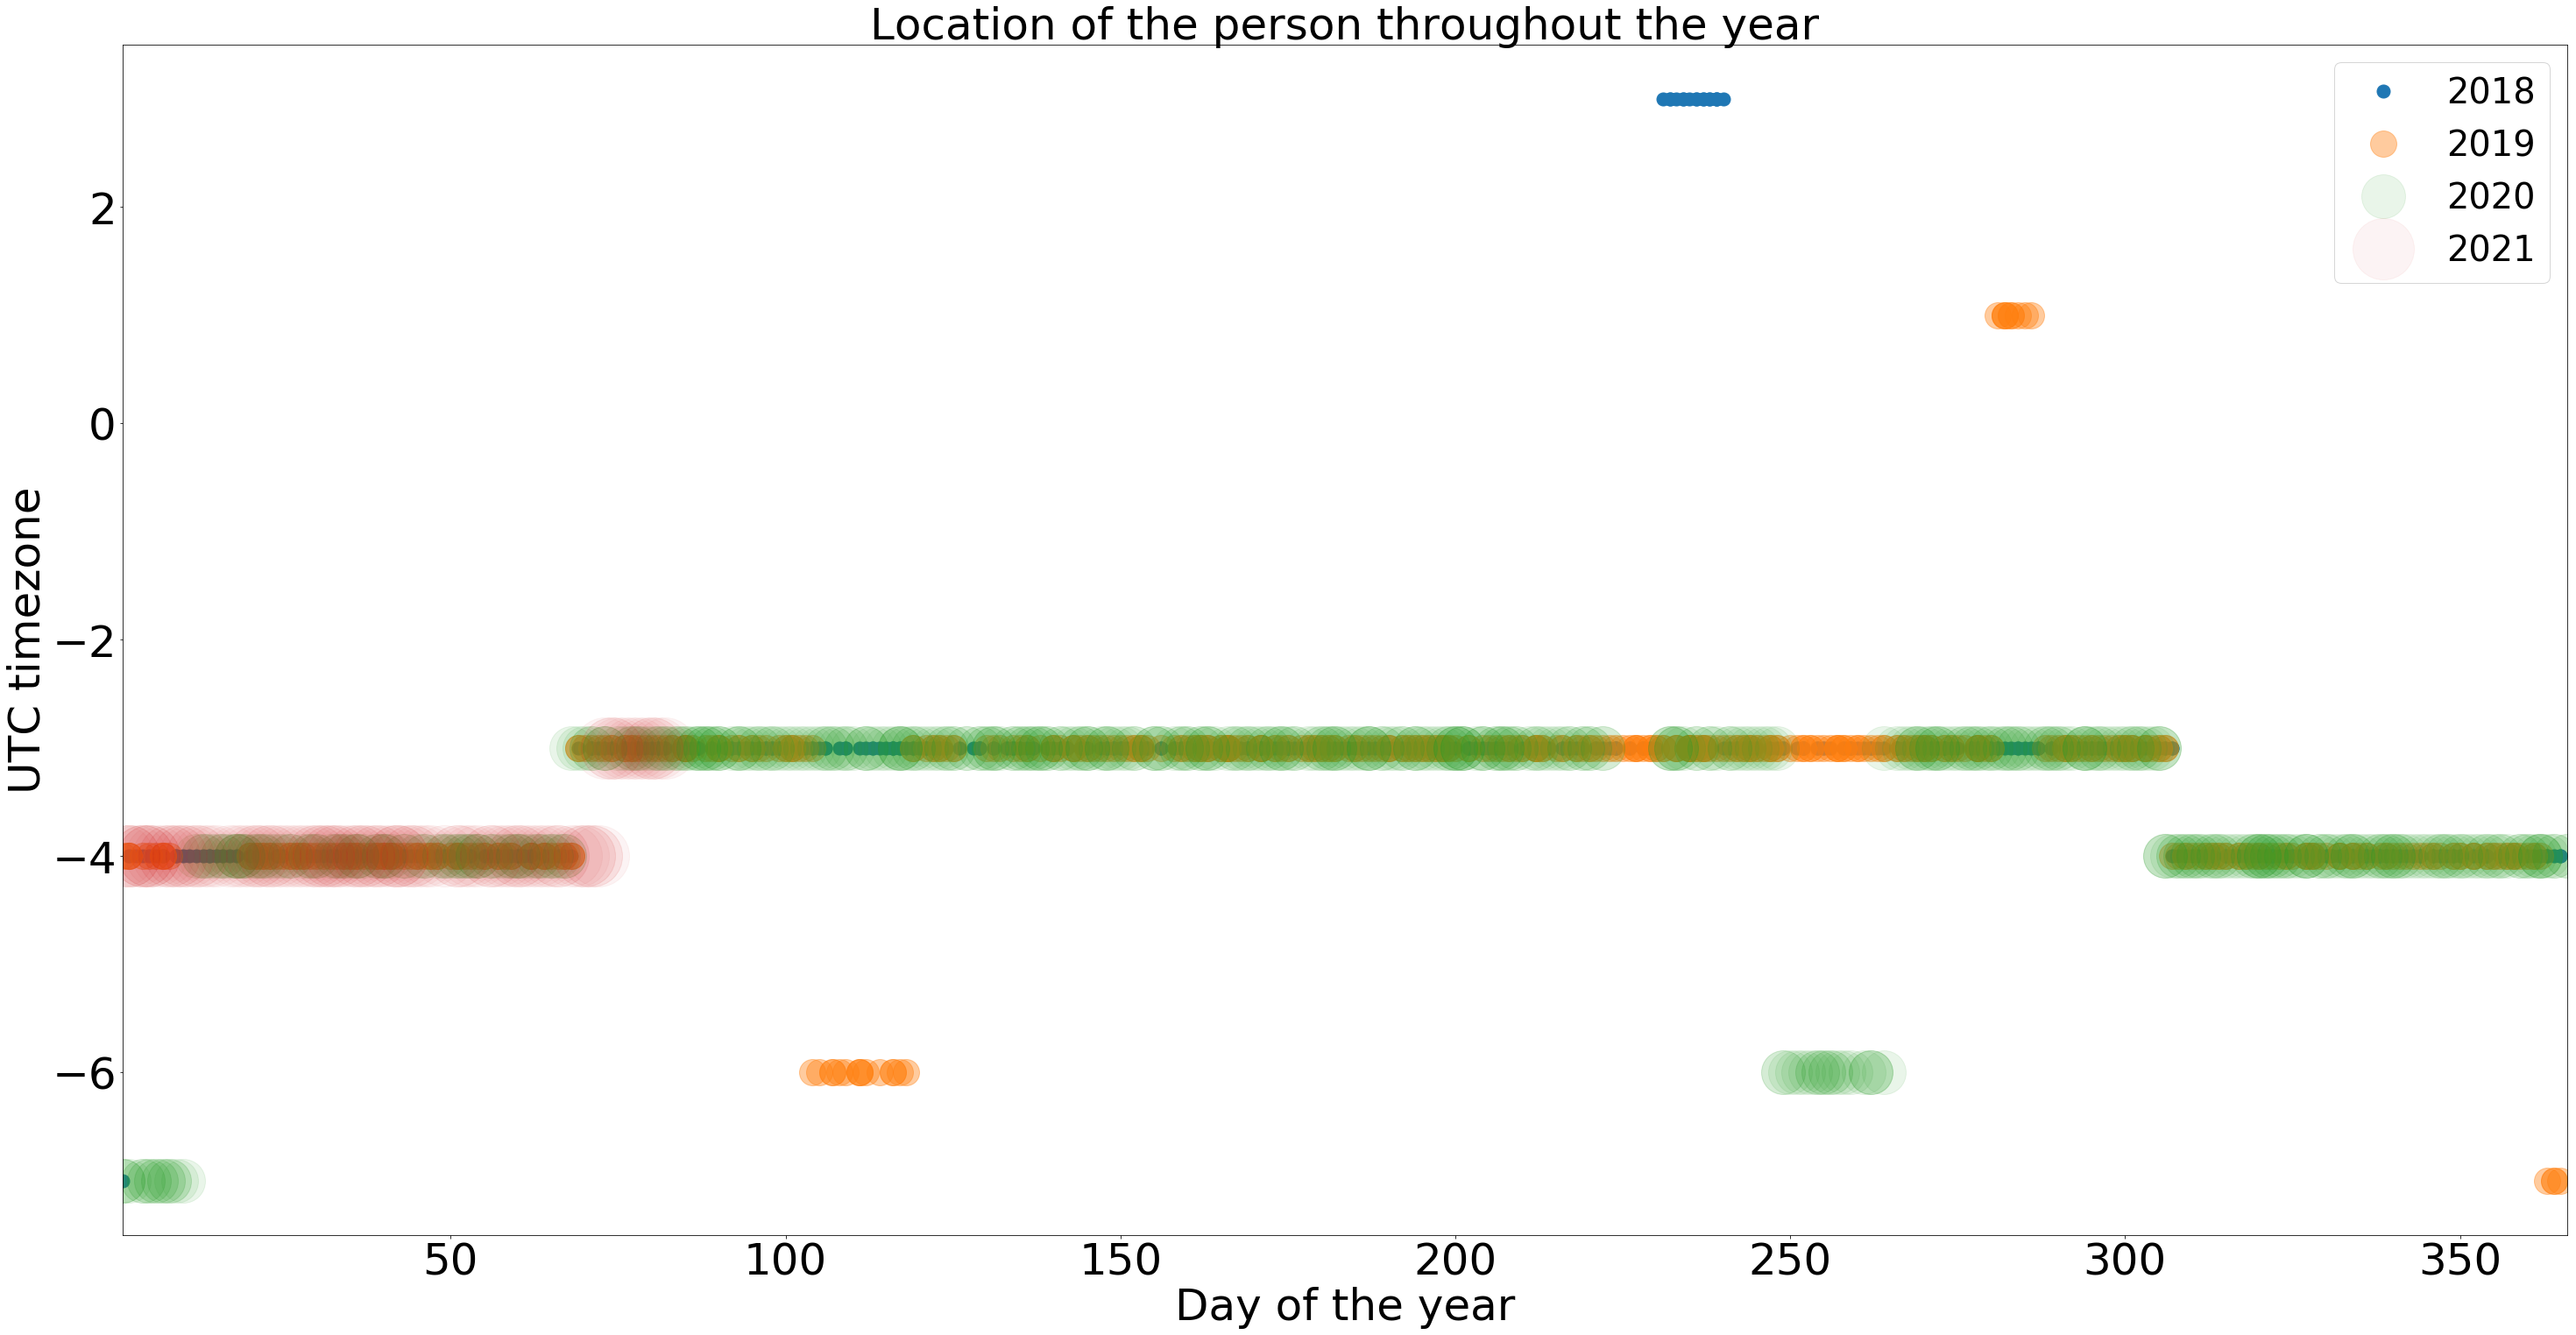

In [9]:
#Plotting the location of the person based on the sleep data

ax = df_sleep[df_sleep.year == 2018].plot(x='day_of_year', y='time_offset1', figsize = (50,25),style='o', markersize=15,fontsize = 50,alpha=1)
df_sleep[df_sleep.year == 2019].plot(x='day_of_year', y='time_offset1', figsize = (50,25),style='o', markersize=30,fontsize = 50, ax=ax,alpha=0.4)
df_sleep[df_sleep.year == 2020].plot(x='day_of_year', y='time_offset1', figsize = (50,25),style='o', markersize=50,fontsize = 50, ax=ax,alpha=0.1)
df_sleep[df_sleep.year == 2021].plot(x='day_of_year', y='time_offset1', figsize = (50,25),style='o', markersize=70,fontsize = 50, ax=ax,alpha=0.05)

ax.legend(['2018', '2019', '2020','2021'],loc='best', ncol=1,fontsize = 40)

ax.set_title("Location of the person throughout the year",fontsize=50)
ax.set_ylabel("UTC timezone", fontsize=50)
ax.set_xlabel("Day of the year", fontsize=50)

## The user is mostly in two time zones throughout the year. The time zone shift by one hour in March and November indicating day light savings. Based on the time zone (UTC -3) the location of the user can be narrowed to a few countries. There are a few travel noted here. But 2020 the user the did not travel to a different time zone which corresponds well to the travel restrictions imposed due to Covid. 

# EXERCISE DATA

In [19]:
df_exercise1 = pd.read_csv("exercise.csv")
df_exercise2 = pd.read_csv("exercise_type.csv")
#df_exercise1.shape[0]

In [20]:
#df_exercise = pd.concat([df_exercise1, df_exercise2],axis=1)
#df_exercise = df_exercise1
df_exercise =pd.merge(df_exercise1, df_exercise2)


#df_exercise['exercise_type']= df_exercise['com.samsung.health.exercise.exercise_type']


In [21]:
df_exercise['end_time']= pd.to_datetime(df_exercise['com.samsung.health.exercise.end_time'])
df_exercise['start_time']= pd.to_datetime(df_exercise['com.samsung.health.exercise.start_time'])

#time zoning
df_exercise['time_offset'] = pd.to_timedelta(df_exercise['com.samsung.health.exercise.time_offset'].str[3:-2].apply(float),unit ='hours')


df_exercise['actual_end_time']= df_exercise['end_time'] +df_exercise['time_offset']
df_exercise['actual_start_time']= df_exercise['start_time'] + df_exercise['time_offset']


df_exercise['weekday_id'] = df_exercise['actual_start_time'].dt.weekday
df_exercise['month_id'] = df_exercise['actual_start_time'].dt.month
df_exercise['day_of_year'] = df_exercise['actual_start_time'].dt.dayofyear
df_exercise['year'] = df_exercise['actual_start_time'].dt.year

# Plotting the location where excercise was recorded by the instrument

Text(0.5, 0, 'Day of the year')

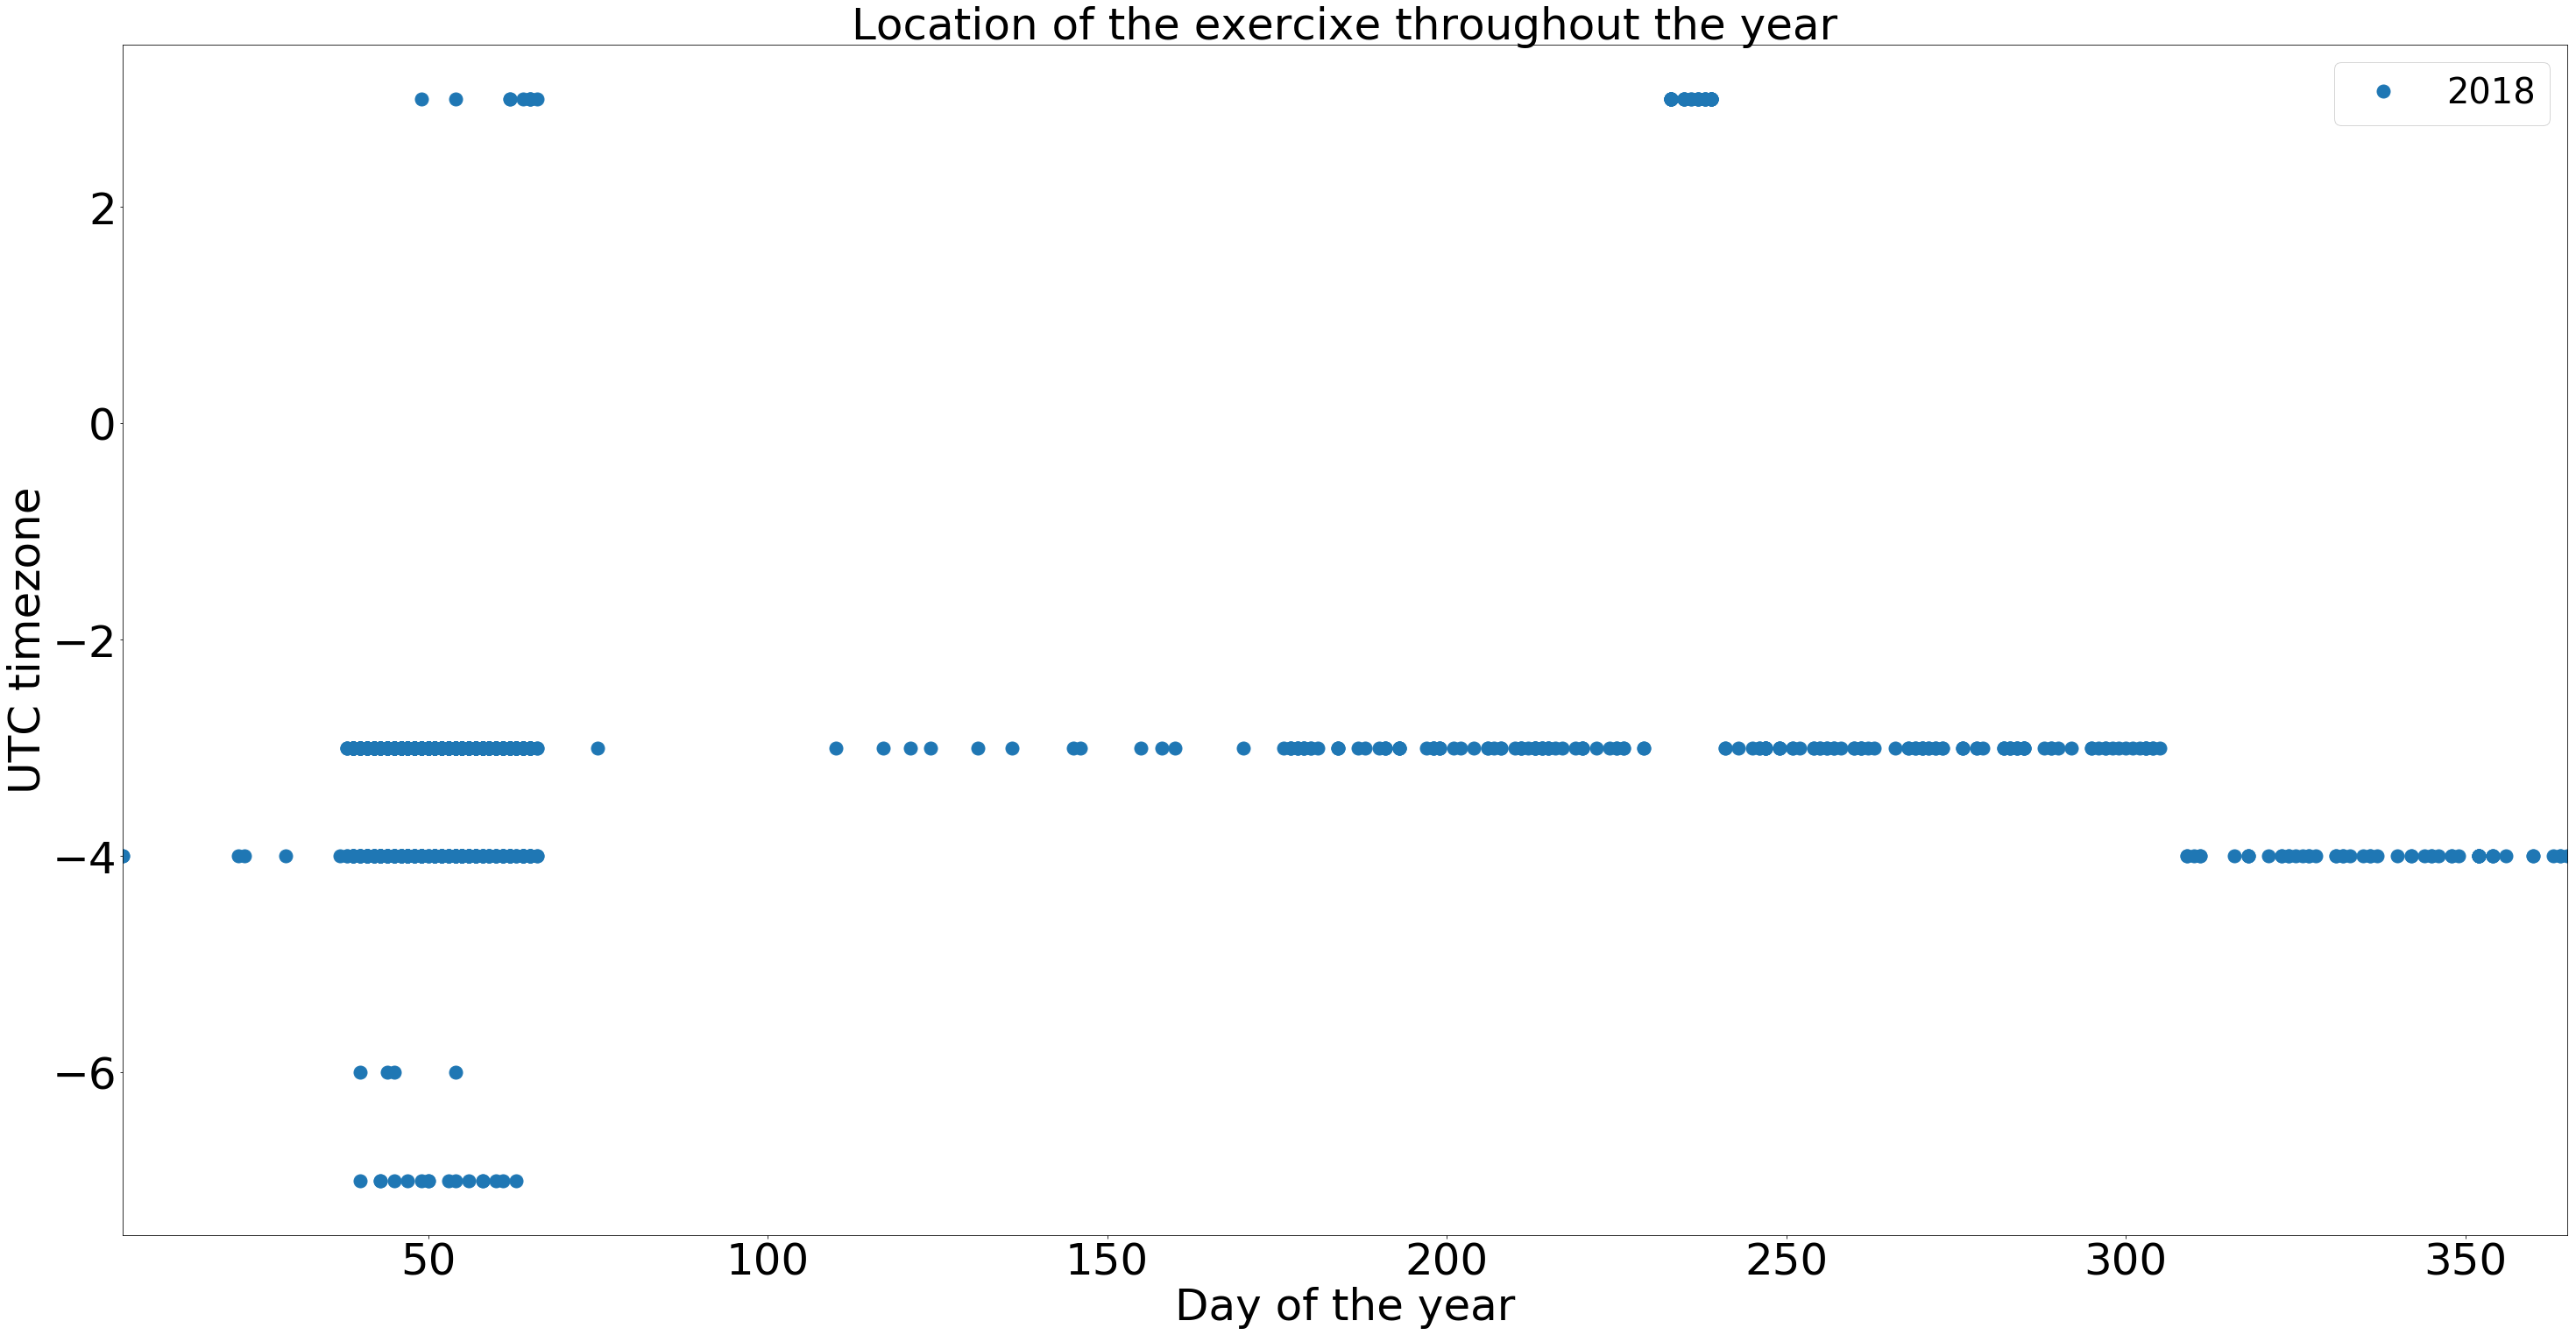

In [22]:
df_exercise['time_offset1'] = df_exercise['com.samsung.health.exercise.time_offset'].str[3:-2].apply(float)

ax = df_exercise[df_exercise.year == 2018].plot(x='day_of_year', y='time_offset1', figsize = (50,25),style='o', markersize=15,fontsize = 50,alpha=1)
#df_exercise[df_exercise.year == 2019].plot(x='day_of_year', y='time_offset1', figsize = (50,25),style='o', markersize=30,fontsize = 50, ax=ax,alpha=0.4)
#df_exercise[df_exercise.year == 2020].plot(x='day_of_year', y='time_offset1', figsize = (50,25),style='o', markersize=50,fontsize = 50, ax=ax,alpha=0.1)
#df_exercise[df_exercise.year == 2021].plot(x='day_of_year', y='time_offset1', figsize = (50,25),style='o', markersize=70,fontsize = 50, ax=ax,alpha=0.05)

ax.legend(['2018', '2019', '2020','2021'],loc='best', ncol=1,fontsize = 40)

ax.set_title("Location of the exercixe throughout the year",fontsize=50)
ax.set_ylabel("UTC timezone", fontsize=50)
ax.set_xlabel("Day of the year", fontsize=50)

## The location data of the excercise reiterates the location of the sleep data for all the years, except 2018. Early in the year, the instrument recorded excercises across different time zones on the same days. This could mean there were different users or the instrument misfired earlier in the year. 

# Does the type of excercise explain the misfiring early in the year of 2018? 

Text(0.5, 0, 'Month')

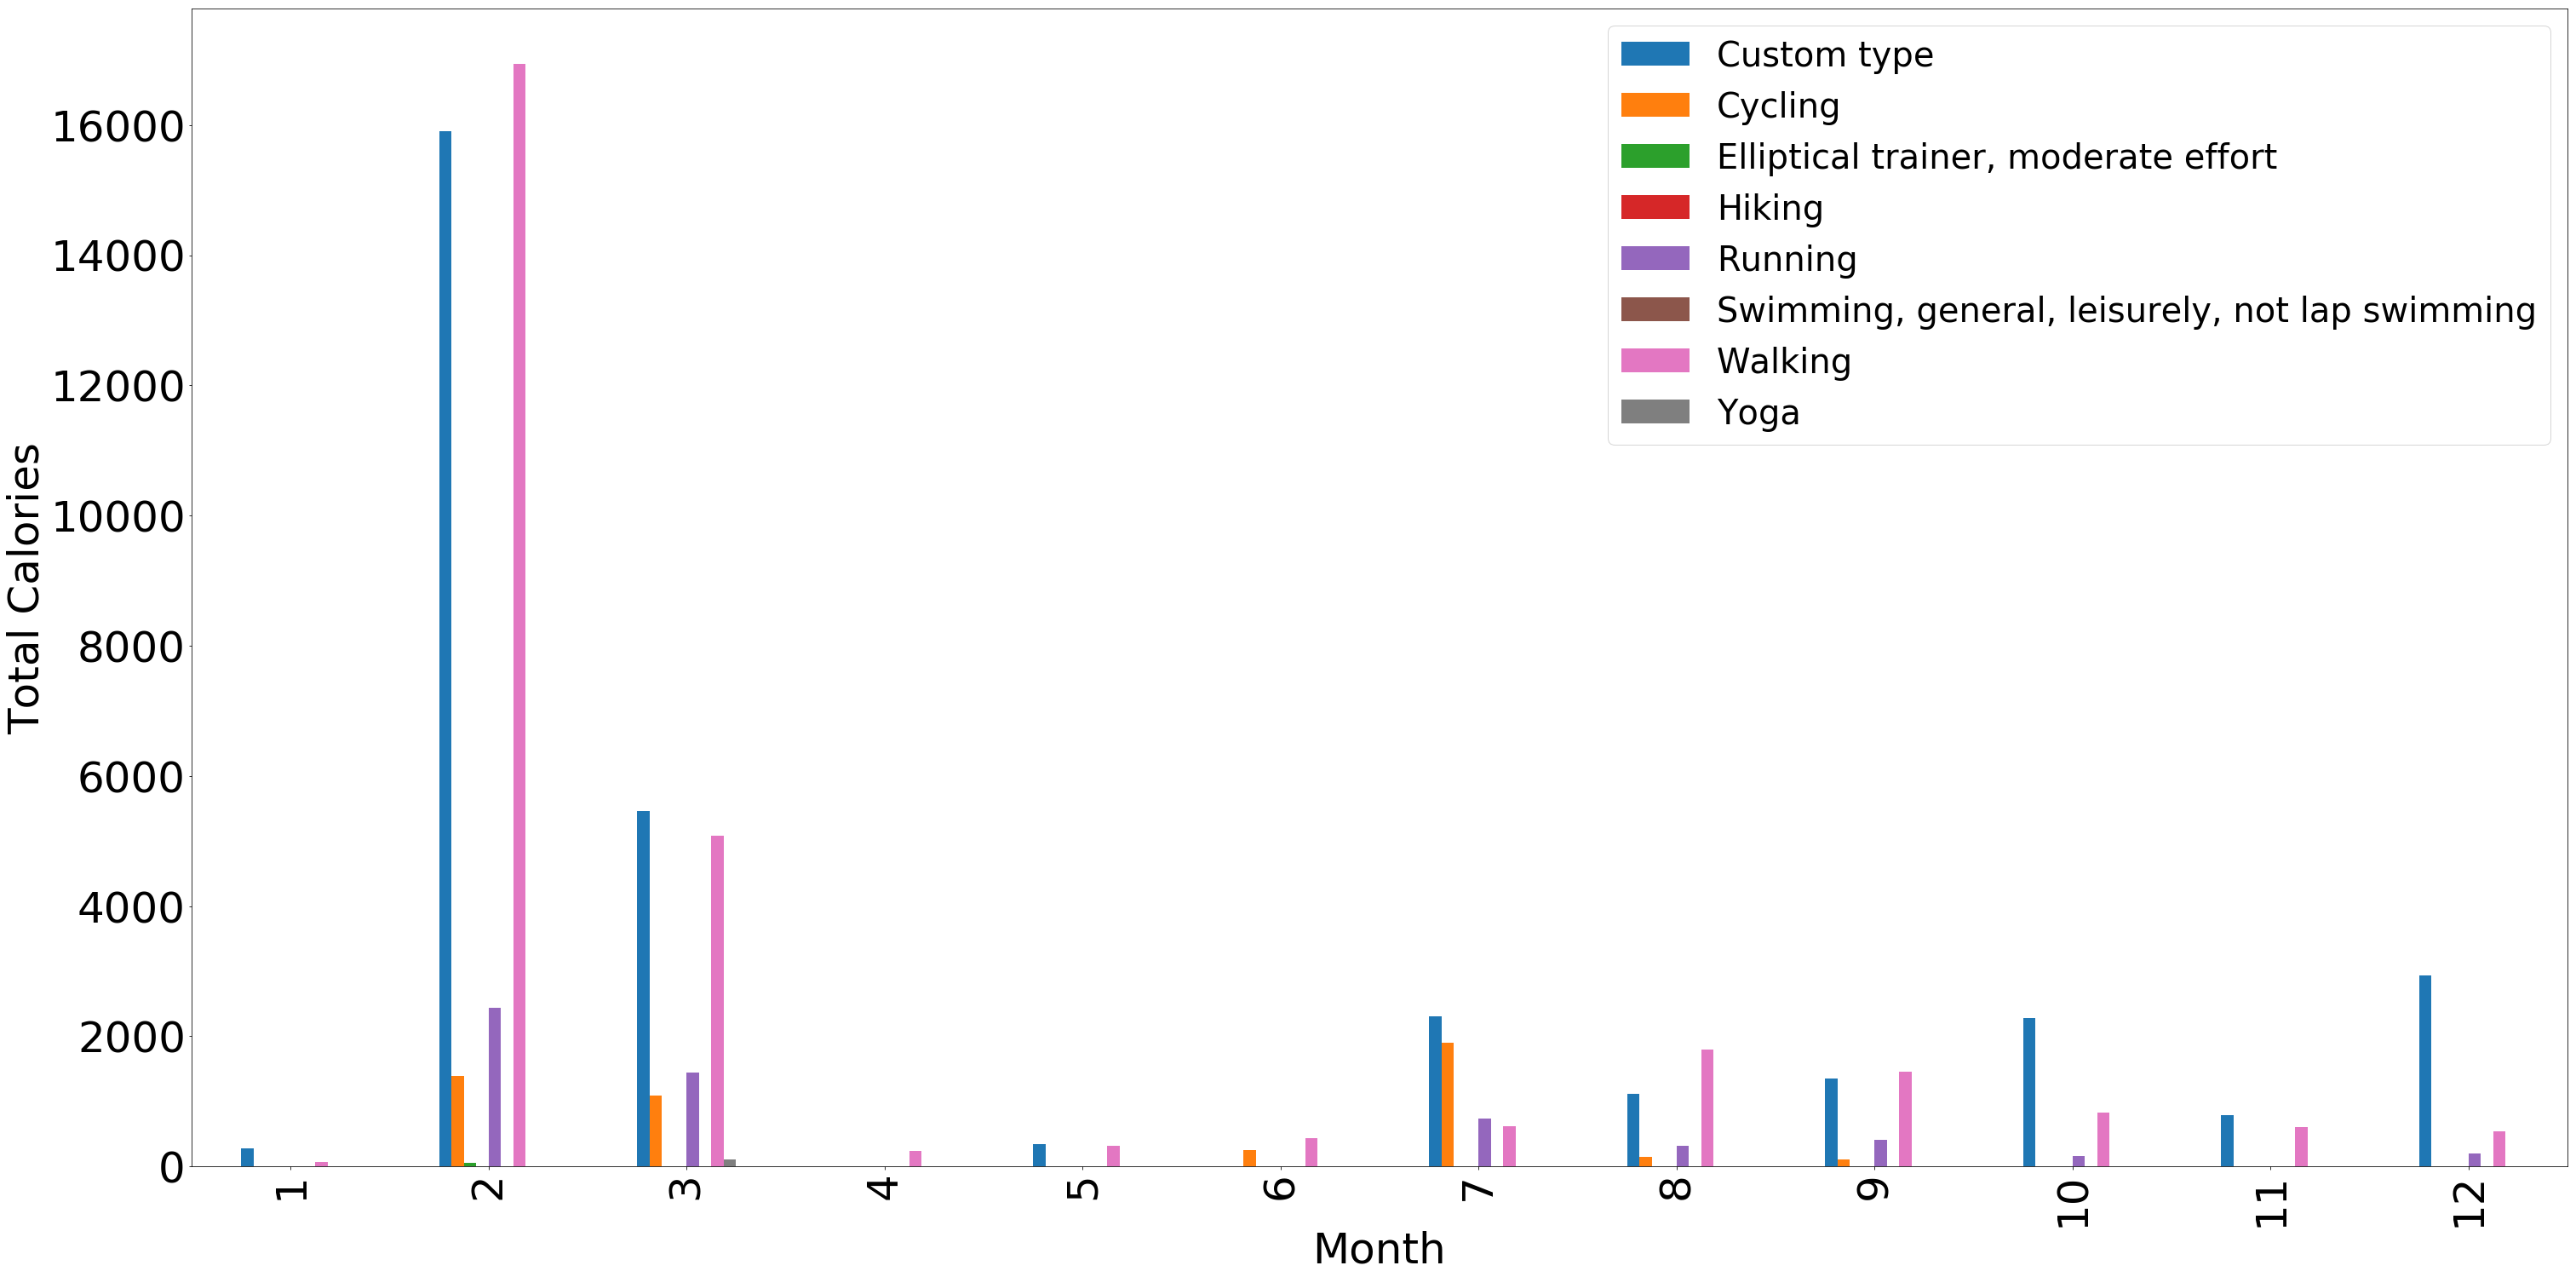

In [23]:
ex = df_exercise[df_exercise.year == 2018].groupby(['month_id','exercise_type'])['total_calorie'].sum().unstack()

ax = ex.plot(kind='bar', stacked=False, figsize = (50,25), fontsize =50)
ax.legend(loc='best', ncol=1,fontsize = 40)

ax.set_ylabel("Total Calories", fontsize=50)
ax.set_xlabel("Month", fontsize=50)

## There is a clearly different pattern for the user in 2018. Early in the year, when the instrument recorded different locations, there is also an increased excercise pattern. This could mean that either, the misfiring of the instrument not just affected the location data but also the recording of the excercise. OR A completely different person used the instrument early in the year. 

# Outdoor exercise versus indoor exercise? 

Text(0.5, 0, 'Month')

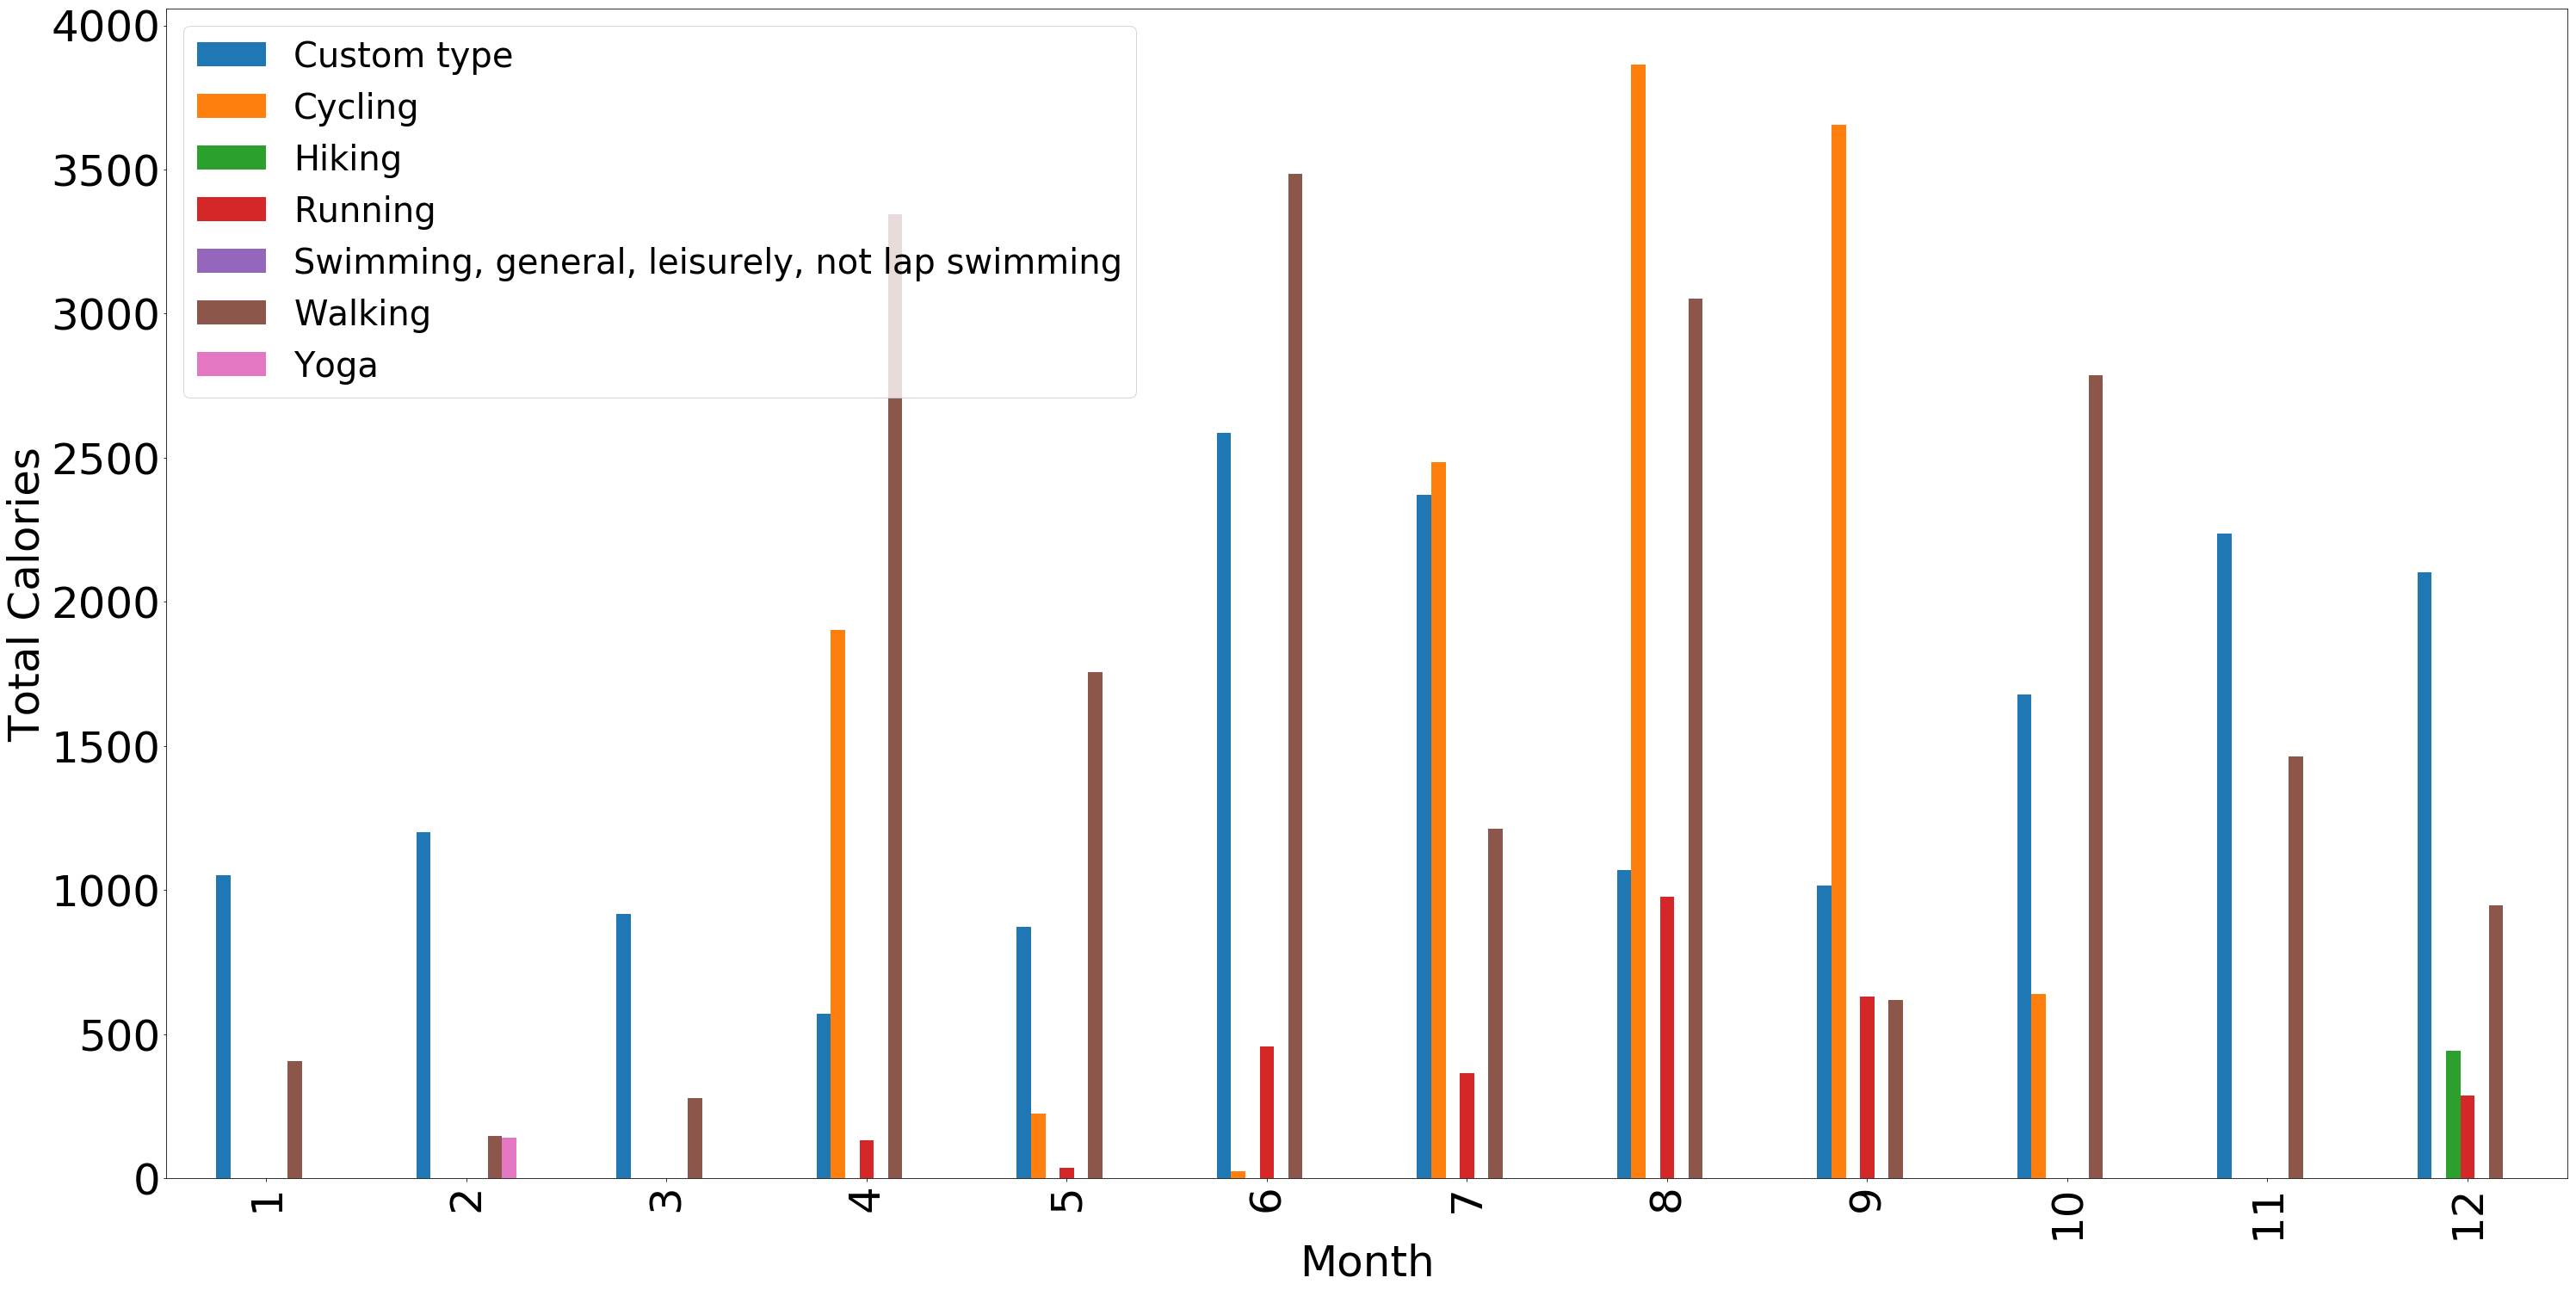

In [23]:
ex = df_exercise[df_exercise.year == 2019].groupby(['month_id','exercise_type'])['total_calorie'].sum().unstack()

ax = ex.plot(kind='bar', stacked=False, figsize = (50,25), fontsize =50)
ax.legend(loc='best', ncol=1,fontsize = 40)

ax.set_ylabel("Total Calories", fontsize=50)
ax.set_xlabel("Month", fontsize=50)

Text(0.5, 0, 'Month')

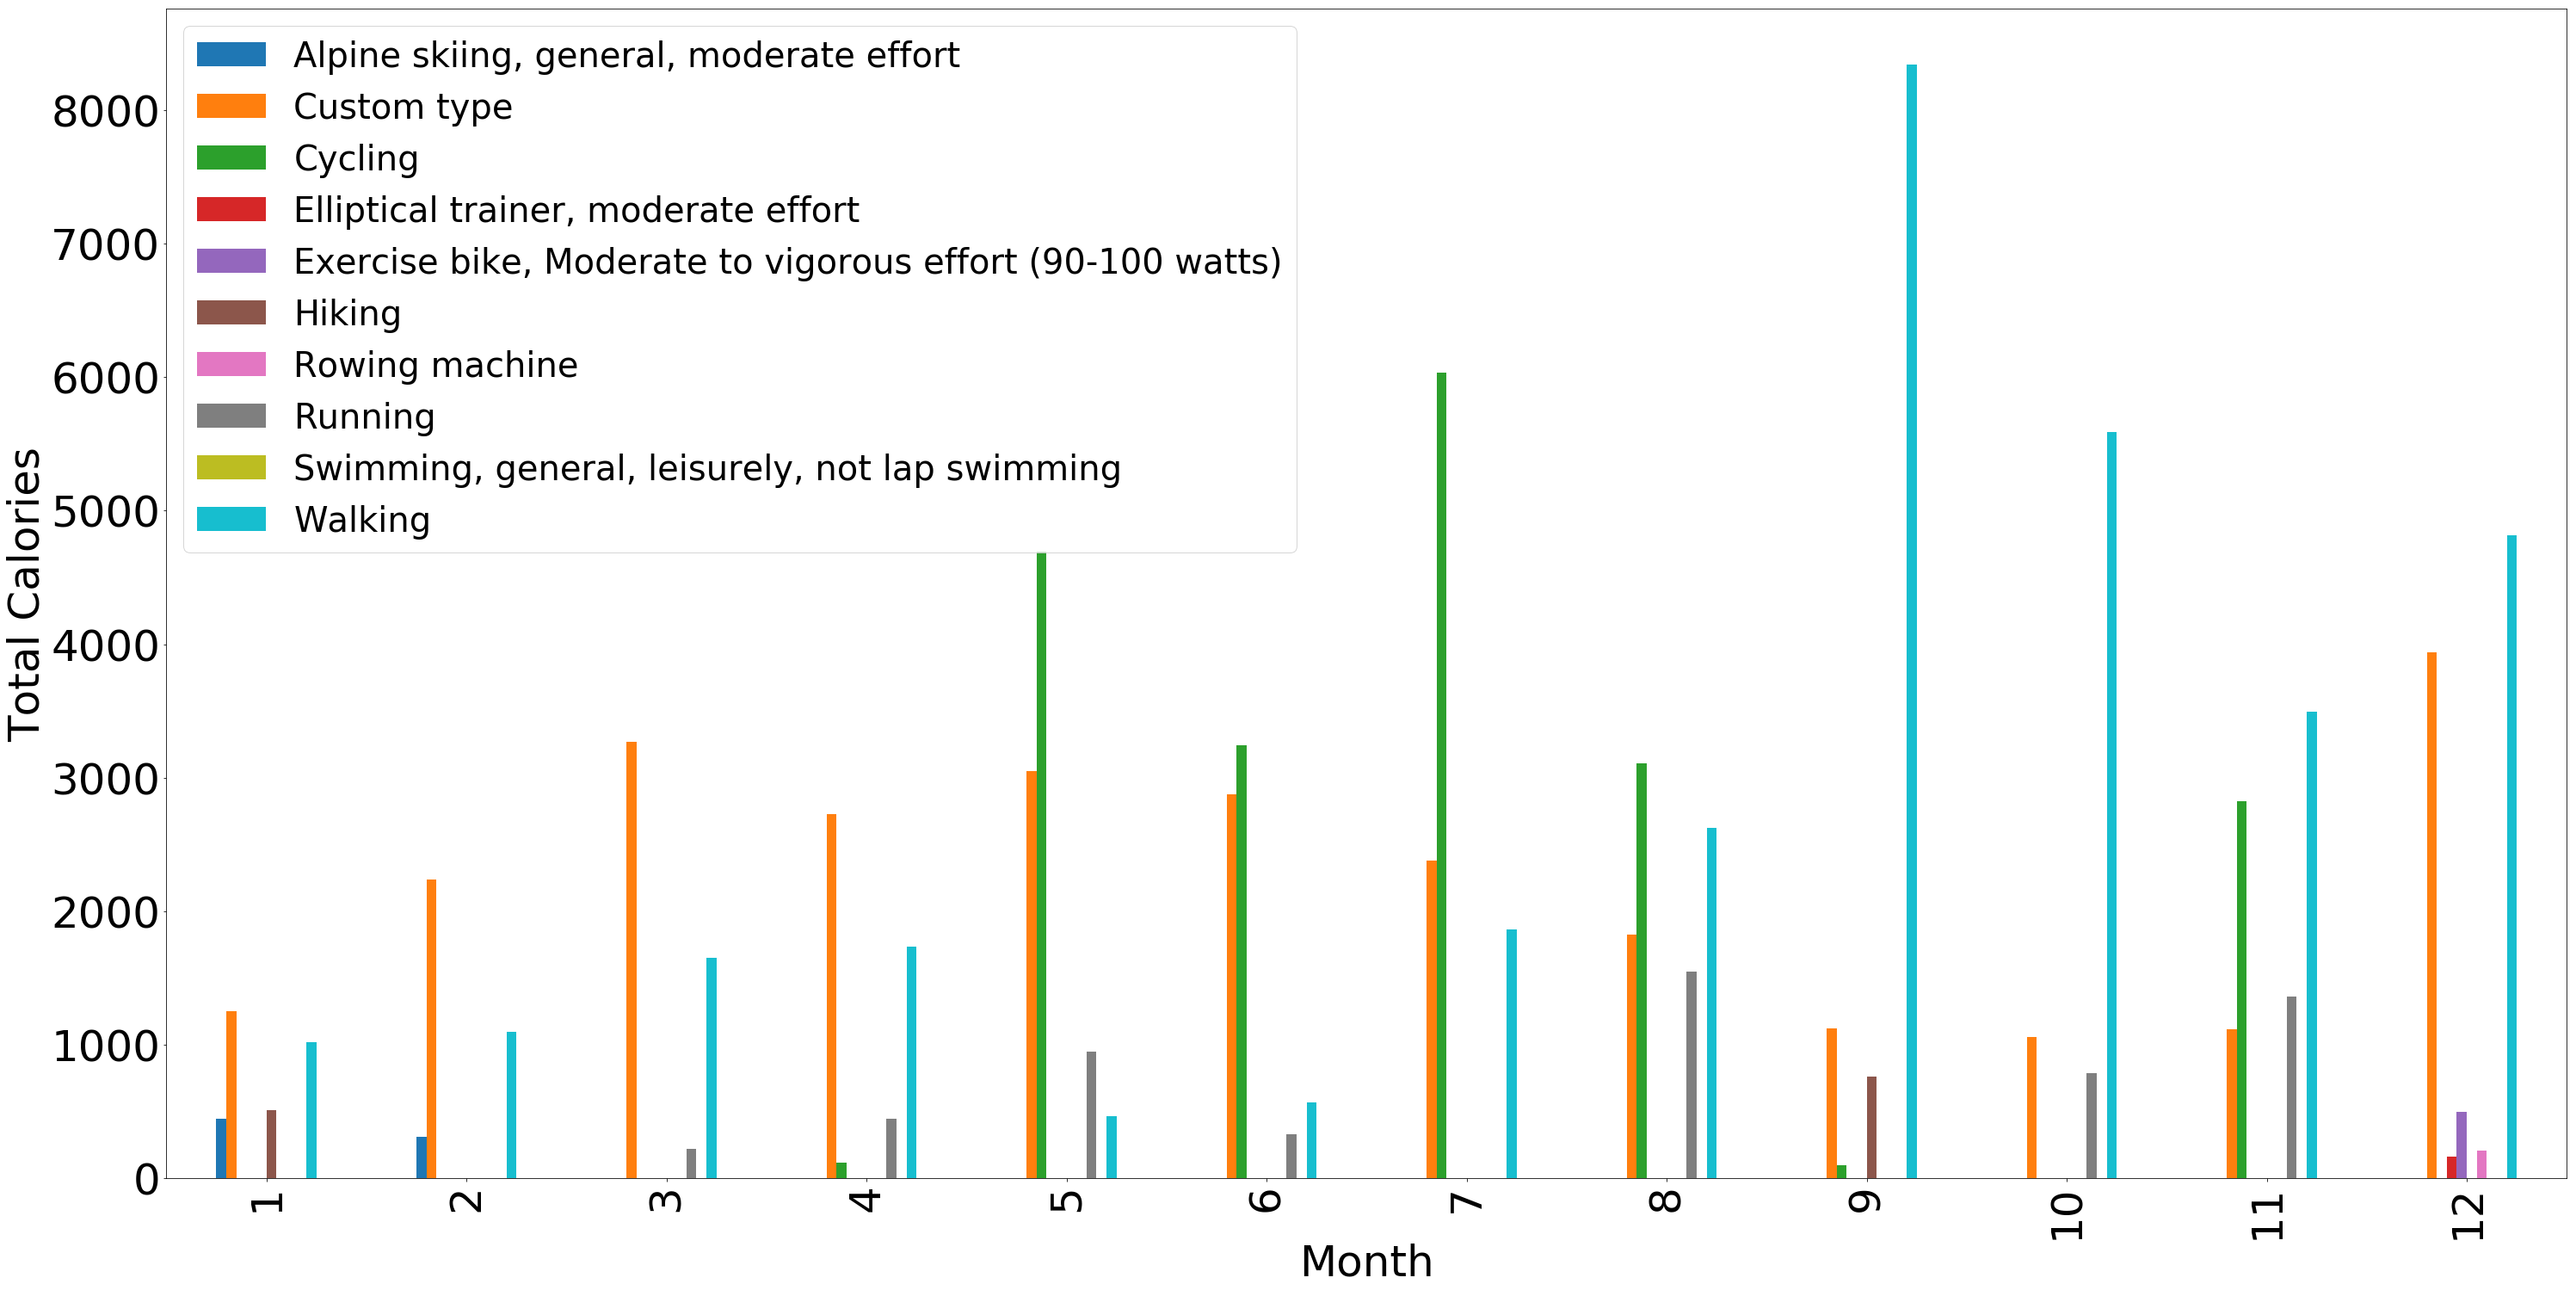

In [24]:
ex = df_exercise[df_exercise.year == 2020].groupby(['month_id','exercise_type'])['total_calorie'].sum().unstack()

ax = ex.plot(kind='bar', stacked=False, figsize = (50,25), fontsize =50)
ax.legend(loc='best', ncol=1,fontsize = 40)

ax.set_ylabel("Total Calories", fontsize=50)
ax.set_xlabel("Month", fontsize=50)

## When you focus on cycling for the years 2019 and 2020, it is clear that the user cycled more in the months that correspond to summer in the northern hemisphere. Hence, the location of the user can be narrowed down to atlantic Canada as it falls on the timezone recorded here and is in the northern hemisphere. 

# Is there a correlation between the sleep time and the calories burnt?

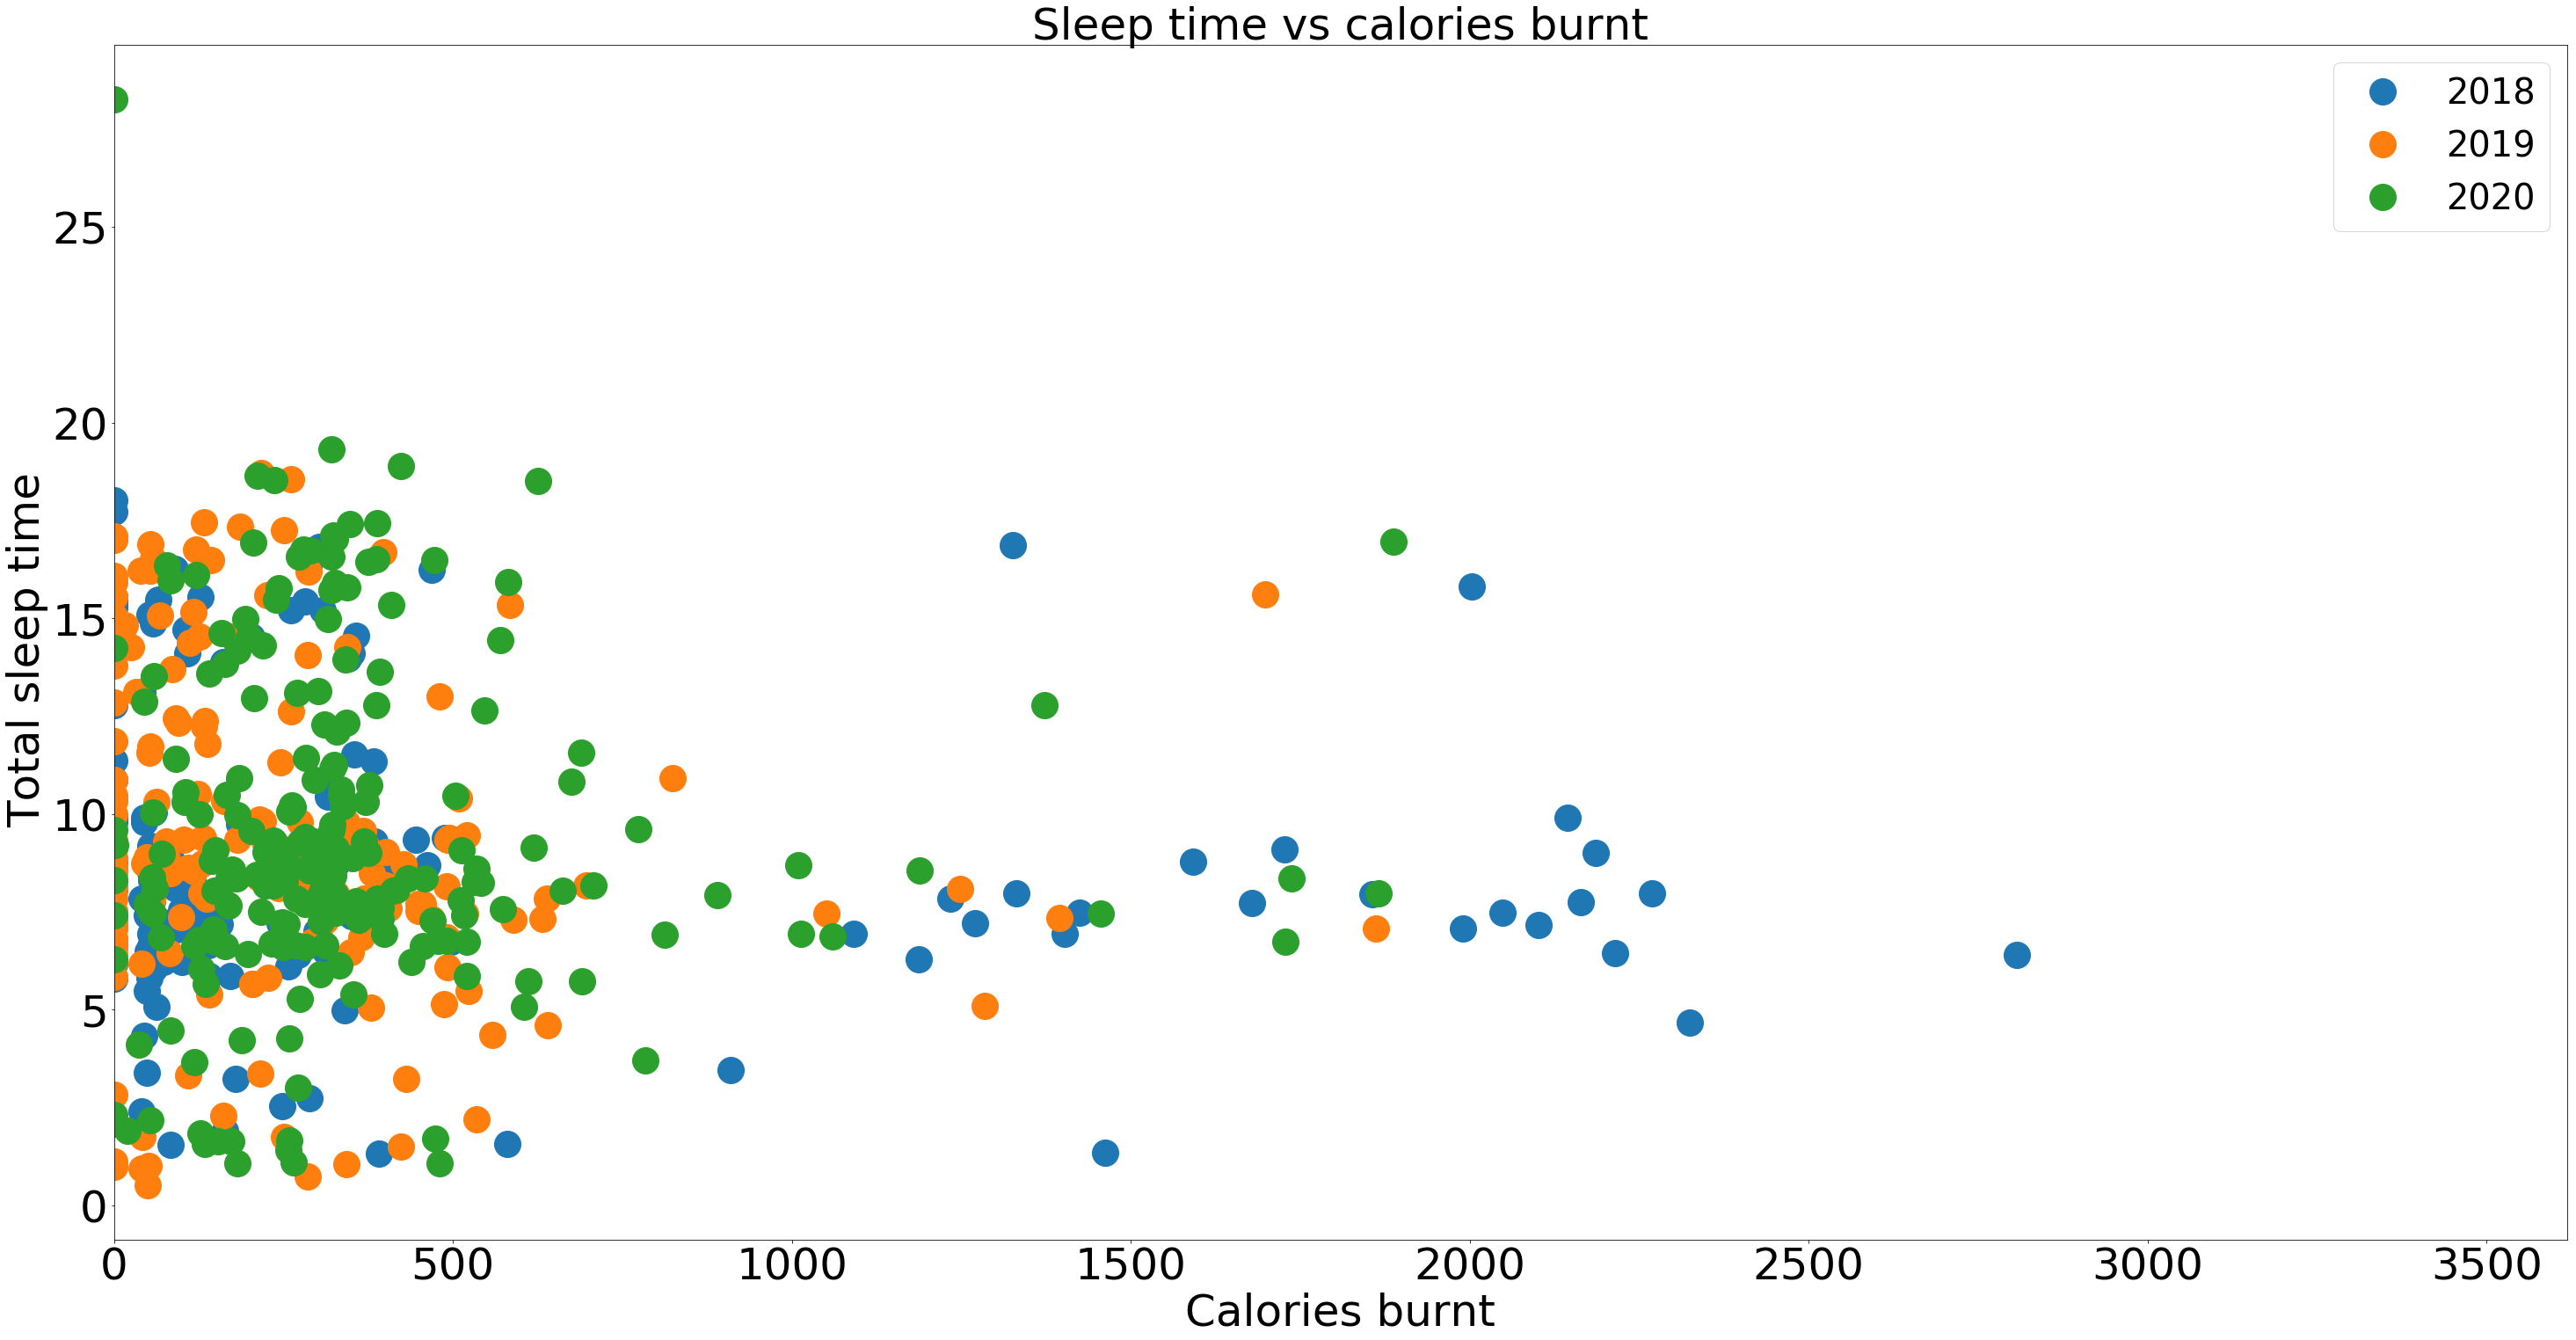

In [25]:
ex = df_exercise[df_exercise.year == 2018].groupby(['day_of_year'])['total_calorie'].sum()
sl = df_sleep[df_sleep.year == 2018].groupby(['day_of_year'])['sleep_time'].sum()
df_sl_ex = pd.concat([ex, sl],axis=1)

ax = df_sl_ex.plot(x='total_calorie', y='sleep_time', figsize = (50,25),style='o', markersize=30,fontsize = 50)




ex = df_exercise[df_exercise.year == 2019].groupby(['day_of_year'])['total_calorie'].sum()
sl = df_sleep[df_sleep.year == 2019].groupby(['day_of_year'])['sleep_time'].sum()
df_sl_ex = pd.concat([ex, sl],axis=1)

df_sl_ex.plot(x='total_calorie', y='sleep_time', figsize = (50,25),style='o', markersize=30,fontsize = 50,ax=ax)



ex = df_exercise[df_exercise.year == 2020].groupby(['day_of_year'])['total_calorie'].sum()
sl = df_sleep[df_sleep.year == 2020].groupby(['day_of_year'])['sleep_time'].sum()
df_sl_ex = pd.concat([ex, sl],axis=1)

df_sl_ex.plot(x='total_calorie', y='sleep_time', figsize = (50,25),style='o', markersize=30,fontsize = 50,ax=ax)

ax.set_title("Sleep time vs calories burnt",fontsize=50)
ax.set_ylabel("Total sleep time ", fontsize=50)
ax.set_xlabel("Calories burnt", fontsize=50)

ax.legend(['2018', '2019', '2020'],loc='best', ncol=1,fontsize = 40)

## You may expect that the user would sleep more on days when more calories were burnt. But that trend is not present here. This is suspicious and more investigaion needs to be done. 